# NLP - Text Analysis - Novel - Treasure Island
This NLP code is written to complete multiple pieces of analysis on text. For this example I have used a novel.  A similar approach can be used on any other long text document or with a minor variaiton using a data frame of text.

by Alex Dance
https://www.linkedin.com/in/alex-dance/

# Contents
* Split words
* Take out Punctuation
* Tokenise to Sentences
* Lemmer and Stemmer
* Take out stop words
* Tokenise
* Label
* Choose Good Words
* See top used words
* Check parts of speech (nouns / verbs etc)
* Identify Entities (Person / Organisation / Places / Facilities etc
* See sentence counts
* Add sentiment and compare and graph
* Add Word Cloud
* Multiple Word Counts (ie phrases)
* Mis spelt words and the correct alternative
* Blobs


In [1]:
import docx2txt
from collections import Counter

In [2]:

## Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

import regex as re
import spacy
import nltk
import string

In [3]:
# Import the libraries we need
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

In [4]:
from csv import reader
from wordcloud import WordCloud, STOPWORDS 

In [5]:
import seaborn as sns

In [6]:
from textblob import TextBlob

# Word Document

In [7]:
my_text = docx2txt.process ('/Users/sasha/Alex_Python_Folder/NLP Project1/Data/Treasure Island.docx')

In [8]:
print(type(my_text))

<class 'str'>


In [9]:
#print(my_text) # is very long

In [10]:
# create a bar chart of the frequency of the words in the text
def plot_words(tokens, top = 30):
    tokens_counter = Counter(tokens)
    tok = [t for (t, _) in tokens_counter.most_common()]
    val = [v for (_, v) in tokens_counter.most_common()]

    plt.figure(figsize = (16, 6))
    plt.bar(tok[:top], val[:top])
    plt.title('Number of terms: %d' % len(tokens_counter))
    plt.xticks(rotation = 90)

    plt.show()

# Word Cloud
* https://www.geeksforgeeks.org/generating-word-cloud-python/
* https://amueller.github.io/word_cloud/auto_examples/simple.html

In [11]:
wordcloudb = WordCloud(background_color="white").generate(my_text)

(-0.5, 399.5, 199.5, -0.5)

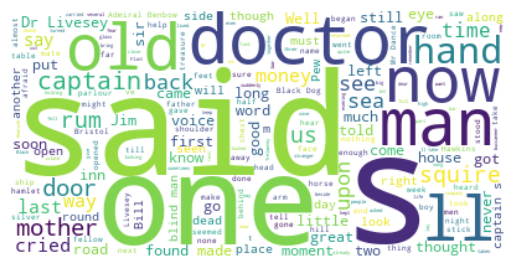

In [12]:
plt.imshow(wordcloudb, interpolation='bilinear')
plt.axis("off")

# from Jason

In [13]:
words = my_text.split()

In [14]:
len(words)

14938

In [15]:
print(words[:10])

['Treasure', 'Island', 'by', 'Robert', 'Louis', 'Stevenson', 'PART', 'ONE', 'The', 'Old']


In [16]:
words2 = re.split(r'\W+', my_text)


In [17]:
print(words2[:15])

['Treasure', 'Island', 'by', 'Robert', 'Louis', 'Stevenson', 'PART', 'ONE', 'The', 'Old', 'Buccaneer', '1', 'The', 'Old', 'Sea']


In [18]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [19]:
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
stripped = [re_punc.sub('', w) for w in words]

In [20]:
re_punc = re.compile('[%s]' % re.escape(string.punctuation))


In [21]:
stripped = [re_punc.sub('', w) for w in words]


In [22]:
print(stripped[:10])

['Treasure', 'Island', 'by', 'Robert', 'Louis', 'Stevenson', 'PART', 'ONE', 'The', 'Old']


In [23]:
table = str.maketrans('', '', string.punctuation)

In [24]:
print(table)

{33: None, 34: None, 35: None, 36: None, 37: None, 38: None, 39: None, 40: None, 41: None, 42: None, 43: None, 44: None, 45: None, 46: None, 47: None, 58: None, 59: None, 60: None, 61: None, 62: None, 63: None, 64: None, 91: None, 92: None, 93: None, 94: None, 95: None, 96: None, 123: None, 124: None, 125: None, 126: None}


In [25]:
from pandas import DataFrame

In [26]:
print(type(stripped))

<class 'list'>


In [27]:
stripped_df = DataFrame (stripped,columns=['Words'])

In [28]:
stripped_df.shape  ## Good

(14938, 1)

In [29]:
stripped_df.nunique()

Words    3041
dtype: int64

In [30]:
stripped_df.head()

,Words
0,Treasure
1,Island
2,by
3,Robert
4,Louis


In [31]:
re_print = re.compile('[^%s]' % re.escape(string.printable))

In [32]:
result = [re_print.sub('', w) for w in words]

In [33]:
words = [word.lower() for word in words]

In [34]:
print(words[:10])

['treasure', 'island', 'by', 'robert', 'louis', 'stevenson', 'part', 'one', 'the', 'old']


In [35]:
#stop_words = set(stopwords.words('english'))
#words = [w for w in words if not w in stop_words]
#print(words[:100])


# Get to Sentences

In [36]:
sentences = nltk.sent_tokenize(my_text)

In [37]:
#print(sentences)

In [38]:
i=0
matrix=[]
for sentence in sentences:

    #print(sentence)
    #print()
    # Extra below
    matrix.append(sentence)
    #print(type(sentence))
    i += 1

In [39]:
sentence_df = pd.DataFrame(matrix,columns=['Sentence'])

In [40]:
sentence_df.head()

,Sentence
0,Treasure Island\nby Robert Louis Stevenson\n\n...
1,"I remember him as if it were yesterday, as he ..."
2,I remember him looking round the cover and whi...
3,Then he rapped on the door with a bit of stick...
4,"This, when it was brought to him, he drank slo..."


In [41]:
sentence_df.shape

(606, 1)

In [42]:
# sentence_df.nunique good but too many rows

In [43]:
# sentence_df['Sentence'].value_counts() good but too many rows

In [44]:
#TestSdf.head()

In [45]:
#TestS2=pd.DataFrame( list(reader(TestS))

In [46]:
for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    #print(words)
    #print()

In [47]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

In [48]:
def compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word, pos):
    """
    Print the results of stemmind and lemmitization using the passed stemmer, lemmatizer, word and pos (part of speech)
    """
    print("Stemmer:", stemmer.stem(word))
    print("Lemmatizer:", lemmatizer.lemmatize(word, pos))
    print()

In [49]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


In [50]:
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word = "seen", pos = wordnet.VERB)
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word = "drove", pos = wordnet.VERB)

Stemmer: seen
Lemmatizer: see

Stemmer: drove
Lemmatizer: drive



In [51]:
from nltk.corpus import stopwords
#print(stopwords.words("english"))

In [52]:
stop_words = set(stopwords.words("english"))

In [53]:
type(sentences)

list

In [54]:
#words = nltk.word_tokenize(sentences) ##??

In [55]:
#re.findall('Sineads', my_text)

In [56]:
len(set(my_text.split(' ')))

3868

remove text or content, e.g. quotes (") or metadata (===)
add content or markers, e.g. (#FLAG, --NAME--)
remove or convert special symbols, e.g. "é" to "e"
remove or convert emoticons

In [57]:
my_text = re.sub(r'[="]', '', my_text)

In [58]:
#my_text = re.sub(r'[=\n]', '', my_text)

#print(my_text[:1000])

# Split Doc into smaller if too big
* https://stackoverflow.com/questions/291740/how-do-i-split-a-huge-text-file-in-python

import logging.handlers
log = logging.getLogger()
fh = logging.handlers.RotatingFileHandler("my_text", 
     maxBytes=2**20*100, backupCount=100) 

100 MB each, up to a maximum of 100 files


log.addHandler(fh)
log.setLevel(logging.INFO)
f = open("my_text")


while True:
    log.info(f.readline().strip())

# spaCy model invocation and text processing
spaCy does the processing of the text as part of the reading of the data

In [59]:
import spacy

In [60]:
# load spaCy and the English model
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 2030000 

# process the text
doc = nlp(my_text)

In [61]:
#print(doc)

# Tokenise

In [62]:
for i, t in enumerate(doc):
     if (i % 1000 == 0) : # only prints 1 in 1,000
        print('%2d| %r' % (i+1, t.text))

 1| 'Treasure'
1001| 'repeat'
2001| 'he'
3001| 'smack'
4001| '“'
5001| 'Bones'
6001| 'I'
7001| 'out'
8001| 'into'
9001| 'back'
10001| 'the'
11001| 'the'
12001| 'his'
13001| '’s'
14001| '”'
15001| 'one'
16001| 'his'
17001| ','
18001| 'of'


# Label

In [63]:
# good but too long
#for entity in doc.ents:
#        print(entity.text,entity.label_)

# Tokenise

In [64]:
## spaCy
print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
for i, t in enumerate(doc):
    if (i % 1000 == 0) : # only prints 1 in 1,000
        print('%2d| %-15r %r' % (i+1, t.text, ('' if t.is_stop else t.text)))

    # break after the first sentence
    #if t.text == '.':
     #   break

i | with stop words without
--| --------------- ------------
 1| 'Treasure'      'Treasure'
1001| 'repeat'        'repeat'
2001| 'he'            ''
3001| 'smack'         'smack'
4001| '“'             '“'
5001| 'Bones'         'Bones'
6001| 'I'             ''
7001| 'out'           ''
8001| 'into'          ''
9001| 'back'          ''
10001| 'the'           ''
11001| 'the'           ''
12001| 'his'           ''
13001| '’s'            ''
14001| '”'             '”'
15001| 'one'           ''
16001| 'his'           ''
17001| ','             ','
18001| 'of'            ''


In [65]:
# extra

In [66]:
## spaCy
good_word_matrix=[]
for i, t in enumerate(doc):
    if not t.is_stop:
        #print(t.text)
        good_word_matrix.append(t.text)

In [67]:
good_word_df= pd.DataFrame(good_word_matrix,columns=['good_words'])

In [68]:
good_word_df.shape

(9208, 1)

In [69]:
good_word_df.head()

,good_words
0,Treasure
1,Island
2,\n
3,Robert
4,Louis


In [70]:
good_word_df.tail()

,good_words
9203,hurry
9204,attracted
9205,notice
9206,","
9207,recognized


In [71]:
print("There are {} observations and {} features in this dataset. \n".format(good_word_df.shape[0],good_word_df.shape[1]))

There are 9208 observations and 1 features in this dataset. 



In [72]:
#good_word_df['good_words'].value_counts()

In [73]:
word_group = good_word_df['good_words'].value_counts()

In [74]:
word_group.head(5)

,       1389
.        617
\n\n     288
“        263
”        262
Name: good_words, dtype: int64

In [75]:
#word_group = word_group.drop(['.','\n\n','“','”','\n\n\n\n',','])

In [76]:
print(type(word_group))

<class 'pandas.core.series.Series'>


In [77]:
pd.DataFrame(word_group,columns=['job_title']).nunique()

job_title    0
dtype: int64

In [78]:
print(type(good_word_df))

<class 'pandas.core.frame.DataFrame'>


In [79]:
#word_group

In [80]:
word_group_df = pd.DataFrame(word_group) #, columns=['pred','b'])

In [81]:
#word_group_df.head()

In [82]:
word_group_df= word_group_df.reset_index() 

In [83]:
#word_group_df.head()

In [84]:
word_group_df= word_group_df.reset_index() 
word_group_df = word_group_df.rename({'index' : 'word', 'good words' : 'number'}, axis=1)

In [85]:
word_group_df.head()

,level_0,word,good_words
0,0,",",1389
1,1,.,617
2,2,\n\n,288
3,3,“,263
4,4,”,262


In [86]:
word_group_df['length'] = word_group_df['word'].str.len()

In [87]:
word_group_df.head()

,level_0,word,good_words,length
0,0,",",1389,1
1,1,.,617,1
2,2,\n\n,288,2
3,3,“,263,1
4,4,”,262,1


In [88]:
word_group_df['length'].value_counts() # Good - word length

6     436
5     423
4     378
7     366
8     242
9     170
3     128
10     98
11     32
1      26
2      16
12     14
13      8
14      3
15      1
16      1
Name: length, dtype: int64

In [89]:
word_group_df.sort_values(by=['length'], ascending=False).head()

,level_0,word,good_words,length
1437,1437,incomprehensible,1,16
941,941,bloodthirstiest,1,15
1010,1010,unintelligible,1,14
1254,1254,P.P.S.–Hawkins,1,14
1307,1307,recommendation,1,14


In [90]:
LongWords = word_group_df[word_group_df['length']>13 ]

In [91]:
LongWords.head(20)

,level_0,word,good_words,length
941,941,bloodthirstiest,1,15
1010,1010,unintelligible,1,14
1254,1254,P.P.S.–Hawkins,1,14
1307,1307,recommendation,1,14
1437,1437,incomprehensible,1,16


In [92]:
#word_group_df = word_group_df.drop(word_group_df['length'] < 3))  # TO DO get rid of short words

In [93]:
#word_group_df['length'] < 3

In [94]:
word_group_df.head(5)

,level_0,word,good_words,length
0,0,",",1389,1
1,1,.,617,1
2,2,\n\n,288,2
3,3,“,263,1
4,4,”,262,1


In [95]:
import matplotlib.pyplot as plt

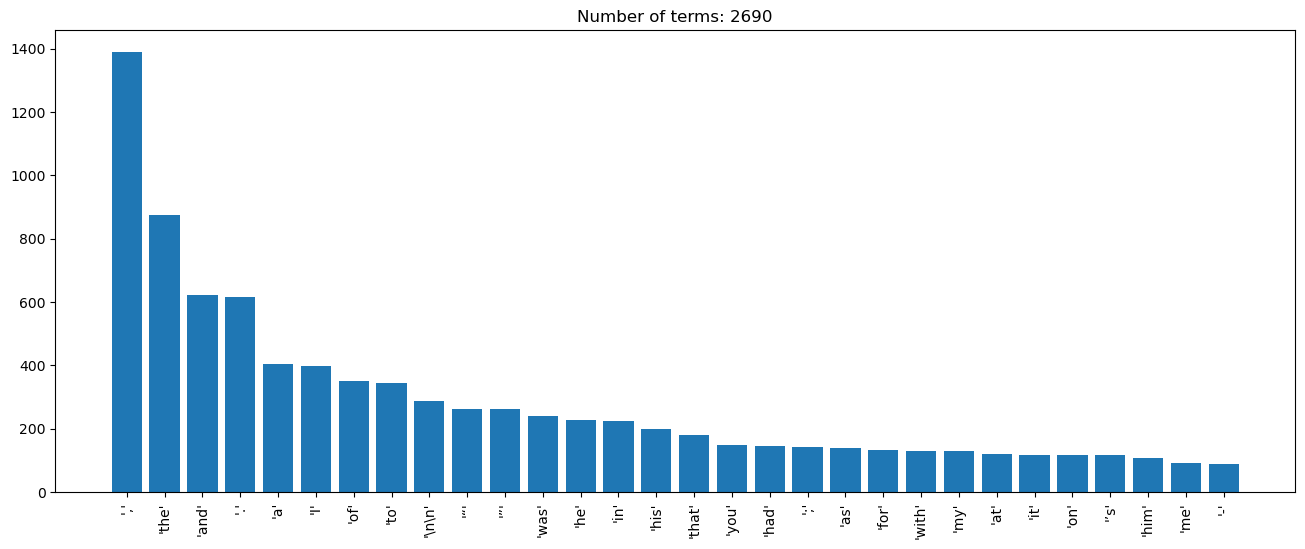

In [96]:
plot_words(['%r' % t.text for t in doc])

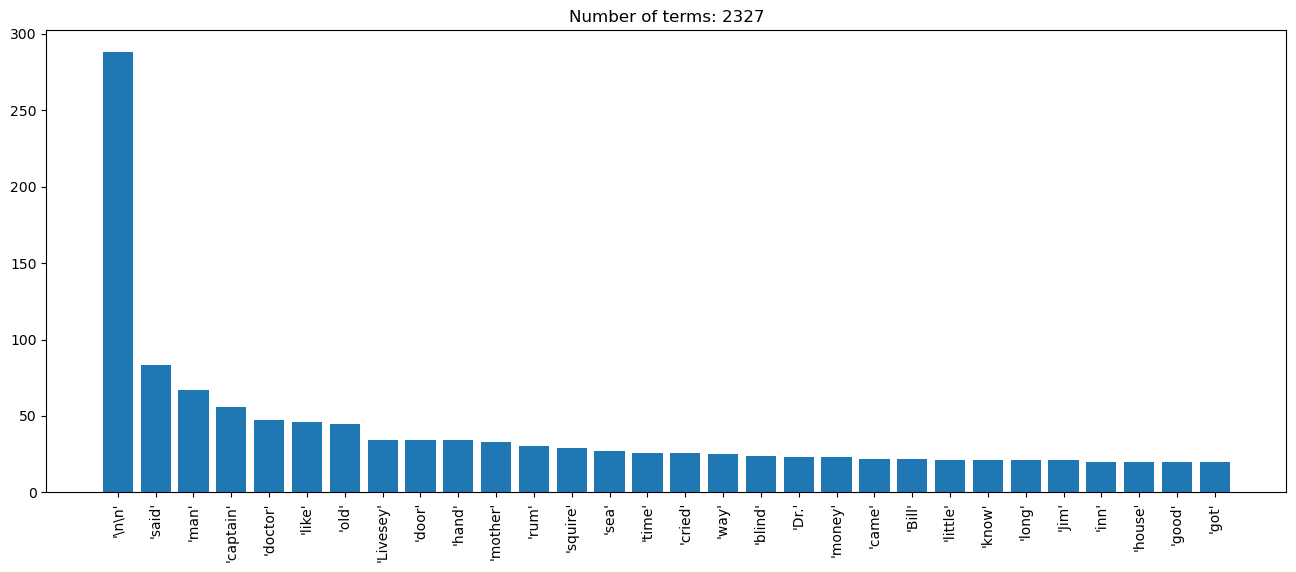

In [97]:
plot_words(['%r' % t.text for t in doc if not (t.is_stop | t.is_punct)])

In [98]:
## spaCy
for i, s in enumerate(doc.sents):
    if (i % 500 == 0) : # only prints 1 in 1,000
        print('%2d: %s' % (i, re.sub(r'\n+', '', s.text)))
        if s.as_doc().ents:
            print('-'*80)
            for e in s.as_doc().ents:
                print('%-11s: %s' % (e.label_, re.sub(r'\n+', '', e.text)))
        print('='*80)

 0: Treasure Islandby Robert Louis StevensonPART ONEThe Old Buccaneer1The Old Sea-dog at the Admiral BenbowSQUIRE TRELAWNEY, Dr. Livesey, and the rest of these gentlemen having asked me to write down the whole particulars about Treasure Island, from the beginning to the end, keeping nothing back but the bearings of the island, and that only because there is still treasure not yet lifted, I take up my pen in the year of grace 17__ and go back to the time when my father kept the Admiral Benbow inn and the brown old seaman with the sabre cut first took up his lodging under our roof.
--------------------------------------------------------------------------------
GPE        : Treasure Island
PERSON     : Robert Louis Stevenson
WORK_OF_ART: The Old Buccaneer
CARDINAL   : 1
ORG        : the Admiral BenbowSQUIRE TRELAWNEY
PERSON     : Livesey
GPE        : Treasure Island
DATE       : the year
CARDINAL   : 17
PERSON     : Benbow
ORDINAL    : first
500: He was the bloodthirstiest buccaneer that

In [99]:
# use nltk to find tokens
tokens = nltk.word_tokenize(my_text)

for i, t in enumerate(tokens[:10]):
    print('%2d| %r' % (i+1, t))

 1| 'Treasure'
 2| 'Island'
 3| 'by'
 4| 'Robert'
 5| 'Louis'
 6| 'Stevenson'
 7| 'PART'
 8| 'ONE'
 9| 'The'
10| 'Old'


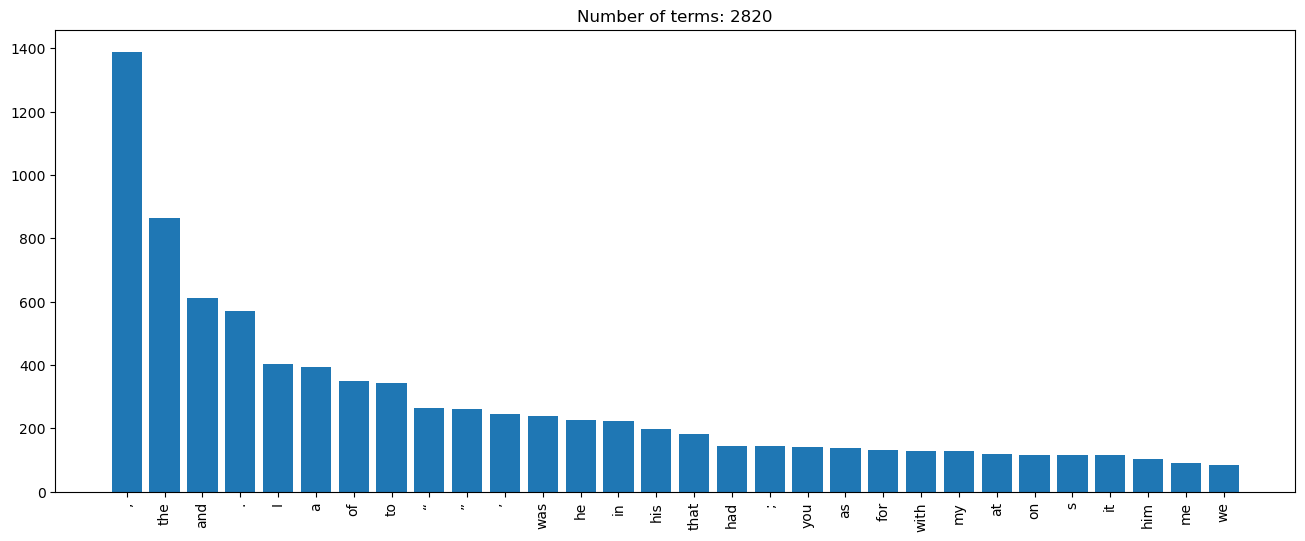

In [100]:
plot_words(tokens)

# Stop Words

In [101]:
## spaCy
print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
for i, t in enumerate(doc):
    if (i % 1000 == 0) : # only prints 1 in 1,000
        print('%2d| %-15r %r' % (i+1, t.text, ('' if t.is_stop else t.text)))

    # break after the first sentence
 #   if t.text == '.':
 #       break

i | with stop words without
--| --------------- ------------
 1| 'Treasure'      'Treasure'
1001| 'repeat'        'repeat'
2001| 'he'            ''
3001| 'smack'         'smack'
4001| '“'             '“'
5001| 'Bones'         'Bones'
6001| 'I'             ''
7001| 'out'           ''
8001| 'into'          ''
9001| 'back'          ''
10001| 'the'           ''
11001| 'the'           ''
12001| 'his'           ''
13001| '’s'            ''
14001| '”'             '”'
15001| 'one'           ''
16001| 'his'           ''
17001| ','             ','
18001| 'of'            ''


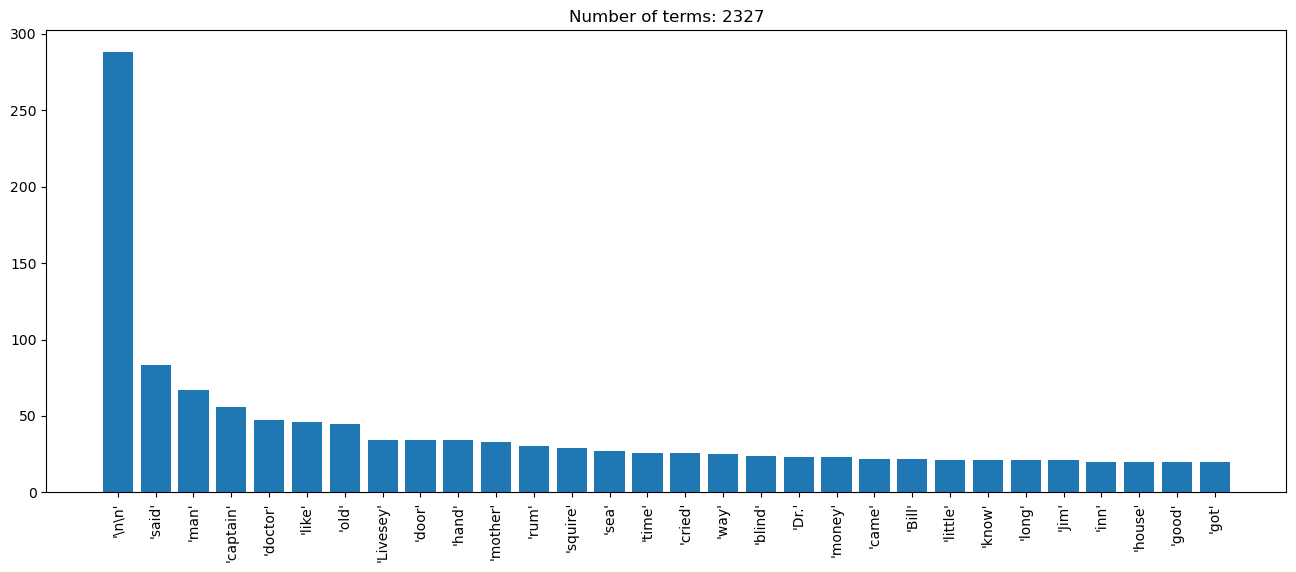

In [102]:
plot_words(['%r' % t.text for t in doc if not (t.is_stop | t.is_punct)])

In [103]:
stopWords = nltk.corpus.stopwords.words('english')
stopWords.sort()

In [104]:
# print(', '.join(stopWords))

In [105]:
for i in range(0, len(stopWords)):
    if (i % 10 == 0) : # only prints 1 in 10
        print(stopWords[i])

a
and
before
d
don't
hadn't
here
into
m
myself
on
own
shouldn
their
through
wasn't
who
you


In [106]:
tokens_no_stop = ('opportunity', 'temporarily', 'the', 'tree') # create a list of tokens withOUT the stop words 

In [107]:
## NLTK
i = 0
j = 0

print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
while i < len(tokens):
    # same word
    if tokens[i] == tokens_no_stop[j]:
        if (i % 1000 == 0) : # only prints 1 in 1,000
            print('%2d| %-15r %r' % (i+1, tokens[i], tokens_no_stop[j]))
            j += 1
    # not the same word
    else:
        if (i % 1000 == 0) : # only prints 1 in 1,000
            print('%2d| %-15r' % (i+1, tokens[i]))

    # next word
    i += 1
    # break after the first sentence
  #  if tokens[i-1] == '.':
  #      break

i | with stop words without
--| --------------- ------------
 1| 'Treasure'     
1001| 'four'         
2001| 'man'          
3001| '.'            
4001| 'with'         
5001| 'himself'      
6001| 'got'          
7001| 'to'           
8001| 'in'           
9001| 'eyes'         
10001| 'wretched'     
11001| 'and'          
12001| ','            
13001| 'the'          
14001| 'Flint'        
15001| 'The'          
16001| 'there'        
17001| 'cove'         
18001| 'to'           


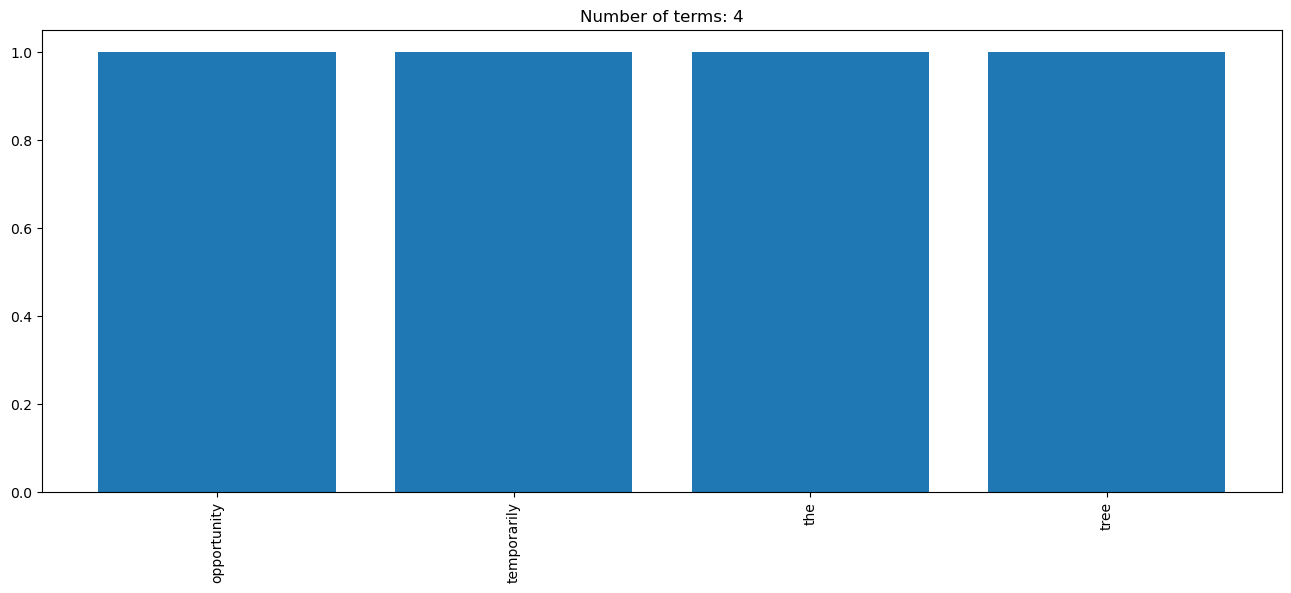

In [108]:
plot_words(tokens_no_stop)

# Check Parts of Speech

In [109]:
## spaCy
for i, t in enumerate(doc):
    if (i % 1000 == 0) : # only prints 1 in 1,000
        print('%2d|%-12r : %-5s %s' % (i+1, t.text, t.pos_, t.tag_))
    #if t.text == '.':
    #    break

 1|'Treasure'   : PROPN NNP
1001|'repeat'     : VERB  VB
2001|'he'         : PRON  PRP
3001|'smack'      : NOUN  NN
4001|'“'          : PUNCT ``
5001|'Bones'      : PROPN NNPS
6001|'I'          : PRON  PRP
7001|'out'        : ADP   IN
8001|'into'       : ADP   IN
9001|'back'       : ADV   RB
10001|'the'        : DET   DT
11001|'the'        : DET   DT
12001|'his'        : PRON  PRP$
13001|'’s'         : PART  POS
14001|'”'          : PUNCT ''
15001|'one'        : NOUN  NN
16001|'his'        : PRON  PRP$
17001|','          : PUNCT ,
18001|'of'         : ADP   IN


In [110]:
matrix_type=[]

## spaCy
for i, t in enumerate(doc):
#print('%2d|%-12r : %-5s %s' % (i+1, t.text, t.pos_, t.tag_))
    matrix_type.append(t.pos_)



In [111]:
matrix_type2=[]

In [112]:
## spaCy
for i, t in enumerate(doc):
#print('%2d|%-12r : %-5s %s' % (i+1, t.text, t.pos_, t.tag_))
    matrix_type2.append(t.pos_)

In [113]:
matrix_type_df = pd.DataFrame(matrix_type,columns=['TagType'])

In [114]:
matrix_type_df.head()

,TagType
0,PROPN
1,PROPN
2,SPACE
3,ADP
4,PROPN


In [115]:
TagType = matrix_type_df['TagType'].value_counts()  # Good

In [116]:
#TagType.head(20)

In [117]:
TagType_df = pd.DataFrame(TagType)

In [118]:
TagType_df.head()

,TagType
PUNCT,2969
NOUN,2694
PRON,2230
VERB,2047
ADP,1753


In [119]:
TagType_df= TagType_df.reset_index() 
TagType_df = TagType_df.rename({'index' : 'Type'}, axis=1)

In [120]:
TagType_df.head(10)

,Type,TagType
0,PUNCT,2969
1,NOUN,2694
2,PRON,2230
3,VERB,2047
4,ADP,1753
5,DET,1591
6,ADJ,977
7,ADV,885
8,AUX,856
9,CCONJ,808


In [121]:
verbs = TagType_df[TagType_df['Type'] =='VERB']

In [122]:
verbs.head()

,Type,TagType
3,VERB,2047


# Useful
* https://www.dataquest.io/blog/natural-language-processing-with-python/

In [123]:
transform_functions = [
    lambda x: len(x),
    lambda x: x.count(" "),
    lambda x: x.count("."),
    lambda x: x.count("!"),
    lambda x: x.count("?"),
    lambda x: len(x) / (x.count(" ") + 1),
    lambda x: x.count(" ") / (x.count(".") + 1),
    lambda x: len(re.findall("d", x)),
    lambda x: len(re.findall("[A-Z]", x)),
]

In [124]:
# Apply each function and put the results into a list.
columns = []
for func in transform_functions:
    columns.append(sentence_df["Sentence"].apply(func))
    # Convert the meta features to a numpy array.
meta = np.asarray(columns).T

In [125]:
sentence_df.head()

,Sentence
0,Treasure Island\nby Robert Louis Stevenson\n\n...
1,"I remember him as if it were yesterday, as he ..."
2,I remember him looking round the cover and whi...
3,Then he rapped on the door with a bit of stick...
4,"This, when it was brought to him, he drank slo..."


In [126]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x208b846d010>,
 [Text(-0.5289971291721837, 0.9644490848808911, 'PUNCT'),
  Text(-1.0930834374717984, 0.12316086523257752, 'NOUN'),
  Text(-0.8271054451891825, -0.7251872741150415, 'PRON'),
  Text(-0.14069116422977668, -1.0909656256306477, 'VERB'),
  Text(0.540691426777356, -0.9579419507514363, 'ADP'),
  Text(0.9695871928855838, -0.5195196583308987, 'DET'),
  Text(1.0981529603448084, -0.06371872319761324, 'ADJ'),
  Text(1.063963692483205, 0.27925125080741203, 'ADV'),
  Text(0.9372820438784355, 0.575762425157341, 'AUX'),
  Text(0.7407095624516474, 0.8132338803153057, 'CCONJ'),
  Text(0.5431176191564097, 0.9565684772988672, 'PROPN'),
  Text(0.38602494097958906, 1.030041137499714, 'SCONJ'),
  Text(0.24513536887578669, 1.0723379369052146, 'PART'),
  Text(0.12279143608233882, 1.0931249989021552, 'SPACE'),
  Text(0.03995384540939533, 1.0992741651821907, 'NUM'),
  Text(0.006691316147242372, 1.099979648124554, 'INTJ'),
  Text(0.00018580051673979995, 1.09999998430

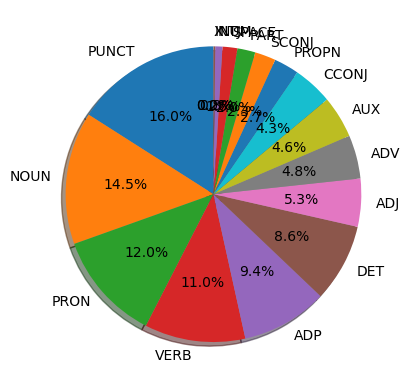

In [127]:
fig1, ax1 = plt.subplots()
ax1.pie(TagType_df['TagType'] ,  labels=TagType_df['Type'] , autopct='%1.1f%%',  shadow=True, startangle=90)

In [128]:
sentence_df.describe()

,Sentence
count,606
unique,605
top,“Mr.
freq,2


# Lemmatisation

In [129]:
## spaCy
print('i | Token        Lemma')
print('--| ------------ ------------')
for i, t in enumerate(doc):
    if (i % 1000 == 0) : # only prints 1 in 1,000
        print('%2d| %-12r %r' % (i+1, t.text, t.lemma_))
    #if t.text == '.':
#break

i | Token        Lemma
--| ------------ ------------
 1| 'Treasure'   'Treasure'
1001| 'repeat'     'repeat'
2001| 'he'         'he'
3001| 'smack'      'smack'
4001| '“'          '"'
5001| 'Bones'      'Bones'
6001| 'I'          'I'
7001| 'out'        'out'
8001| 'into'       'into'
9001| 'back'       'back'
10001| 'the'        'the'
11001| 'the'        'the'
12001| 'his'        'his'
13001| '’s'         '’s'
14001| '”'          '"'
15001| 'one'        'one'
16001| 'his'        'his'
17001| ','          ','
18001| 'of'         'of'


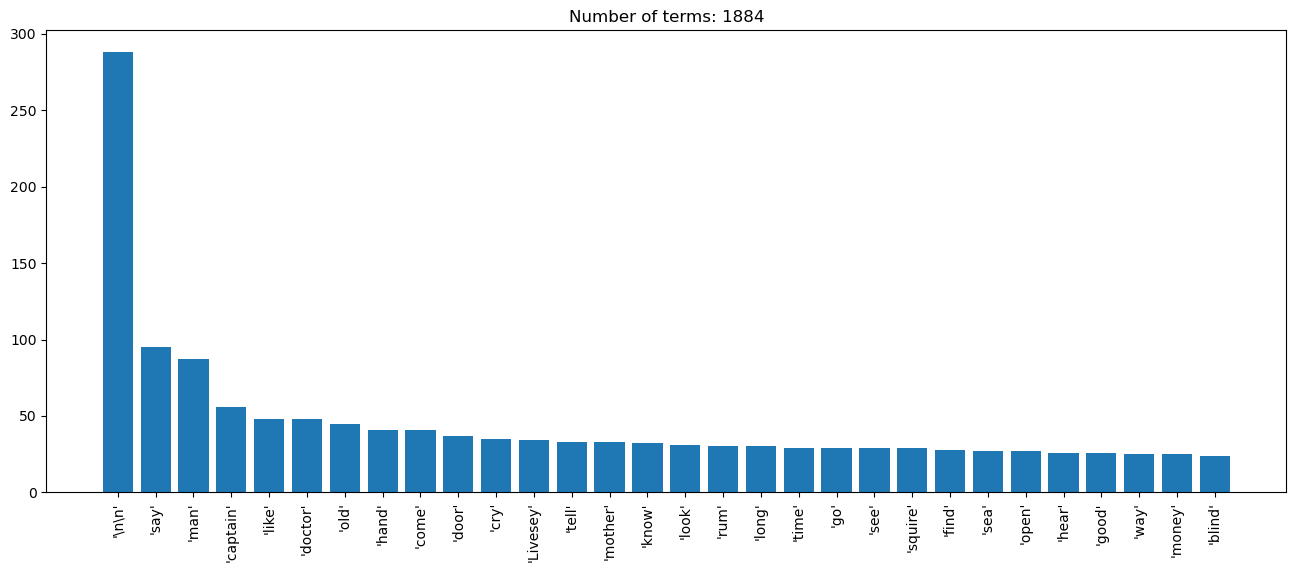

In [130]:
plot_words(['%r' % t.lemma_ for t in doc if not (t.is_stop | t.is_punct)])

# Identify Entities

## spaCy
for i, s in enumerate(doc.sents):
    print('%2d: %s' % (i, re.sub(r'\n+', '', s.text)))
    if s.as_doc().ents:
        print('-'*80)
        for e in s.as_doc().ents:
            print('%-11s: %s' % (e.label_, re.sub(r'\n+', '', e.text)))
    print('='*80)

# Tokenise

In [131]:
# use nltk to find tokens
tokens = nltk.word_tokenize(my_text)

#for i, t in enumerate(tokens[:25]):
for i, t in enumerate(tokens[:]):
    if (i % 1000 == 0) : # only prints 1 in 1,000
        print('%2d| %r' % (i+1, t))

 1| 'Treasure'
1001| 'four'
2001| 'man'
3001| '.'
4001| 'with'
5001| 'himself'
6001| 'got'
7001| 'to'
8001| 'in'
9001| 'eyes'
10001| 'wretched'
11001| 'and'
12001| ','
13001| 'the'
14001| 'Flint'
15001| 'The'
16001| 'there'
17001| 'cove'
18001| 'to'


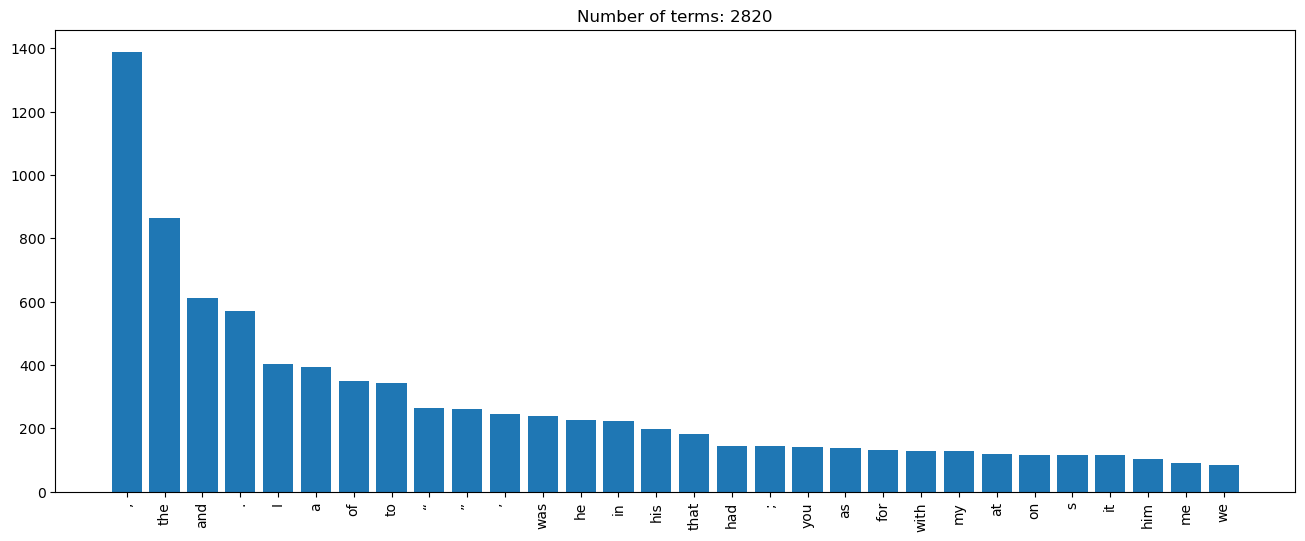

In [132]:
plot_words(tokens)

In [133]:
pos_list = {
    'CC':   'coordinating conjunction',
    'CD':   'cardinal digit',
    'DT':   'determiner',
    'EX':   'existential there (like: "there is" ... think of it like "there exists")',
    'FW':   'foreign word',
    'IN':   'preposition/subordinating conjunction',
    'JJ':   'adjective "big"',
    'JJR':  'adjective, comparative "bigger"',
    'JJS':  'adjective, superlative "biggest"',
    'LS':   'list marker 1)',
    'MD':   'modal could, will',
    'NN':   'noun, singular "desk"',
    'NNS':  'noun plural "desks"',
    'NNP':  'proper noun, singular "Harrison"',
    'NNPS': 'proper noun, plural "Americans"',
    'PDT':  'predeterminer "all the kids"',
    'POS':  'possessive ending parent"s',
    'PRP':  'personal pronoun I, he, she',
    'PRP$': 'possessive pronoun my, his, hers',
    'RB':   'adverb very, silently,',
    'RBR':  'adverb, comparative better',
    'RBS':  'adverb, superlative best',
    'RP':   'particle give up',
    'TO':   'to go "to" the store.',
    'UH':   'interjection errrrrrrrm',
    'VB':   'verb, base form take',
    'VBD':  'verb, past tense took',
    'VBG':  'verb, gerund/present participle taking',
    'VBN':  'verb, past participle taken',
    'VBP':  'verb, sing. present, non-3d take',
    'VBZ':  'verb, 3rd person sing. present takes',
    'WDT':  'wh-determiner which',
    'WP':   'wh-pronoun who, what',
    'WP$':  'possessive wh-pronoun whose',
    'WRB':  'wh-abverb where, when',
}

In [134]:
## nltk
tagged = nltk.pos_tag(tokens)

for i, t in enumerate(tagged[:]):
    if (i % 1000 == 0) : # only prints 1 in 1,000
        print('%2d|%-12r : %-4s %s' % (i+1, t[0], t[1], (pos_list[t[1]] if t[1] in pos_list else '-')))

 1|'Treasure'   : NN   noun, singular "desk"
1001|'four'       : CD   cardinal digit
2001|'man'        : NN   noun, singular "desk"
3001|'.'          : .    -
4001|'with'       : IN   preposition/subordinating conjunction
5001|'himself'    : PRP  personal pronoun I, he, she
6001|'got'        : VBD  verb, past tense took
7001|'to'         : TO   to go "to" the store.
8001|'in'         : IN   preposition/subordinating conjunction
9001|'eyes'       : NNS  noun plural "desks"
10001|'wretched'   : JJ   adjective "big"
11001|'and'        : CC   coordinating conjunction
12001|','          : ,    -
13001|'the'        : DT   determiner
14001|'Flint'      : NNP  proper noun, singular "Harrison"
15001|'The'        : DT   determiner
16001|'there'      : EX   existential there (like: "there is" ... think of it like "there exists")
17001|'cove'       : NN   noun, singular "desk"
18001|'to'         : TO   to go "to" the store.


# stemming

In [135]:
## nltk
ps = nltk.porter.PorterStemmer()
stemmed = ' '.join([ps.stem(word) for word in my_text.split()])

### Lemmatization

In [136]:
## nltk
wl = nltk.stem.WordNetLemmatizer()
lemma = ' '.join([wl.lemmatize(word) for word in my_text.split()])

In [137]:
## nltk
dot = stemmed.find('.') + 1
sl = stemmed[:dot].split()
dot = lemma.find('.') + 1
ll = lemma[:dot].split()

print('i | Stem           Lemma')
print('--| -------------- ------------')
for i, p in enumerate(zip(sl, ll)):
    print('%2d| %-12r   %-12r' % (i+1, p[0], p[1]))

i | Stem           Lemma
--| -------------- ------------
 1| 'treasur'      'Treasure'  
 2| 'island'       'Island'    
 3| 'by'           'by'        
 4| 'robert'       'Robert'    
 5| 'loui'         'Louis'     
 6| 'stevenson'    'Stevenson' 
 7| 'part'         'PART'      
 8| 'one'          'ONE'       
 9| 'the'          'The'       
10| 'old'          'Old'       
11| 'buccan'       'Buccaneer' 
12| '1'            '1'         
13| 'the'          'The'       
14| 'old'          'Old'       
15| 'sea-dog'      'Sea-dog'   
16| 'at'           'at'        
17| 'the'          'the'       
18| 'admir'        'Admiral'   
19| 'benbow'       'Benbow'    
20| 'squir'        'SQUIRE'    
21| 'trelawney,'   'TRELAWNEY,'
22| 'dr.'          'Dr.'       


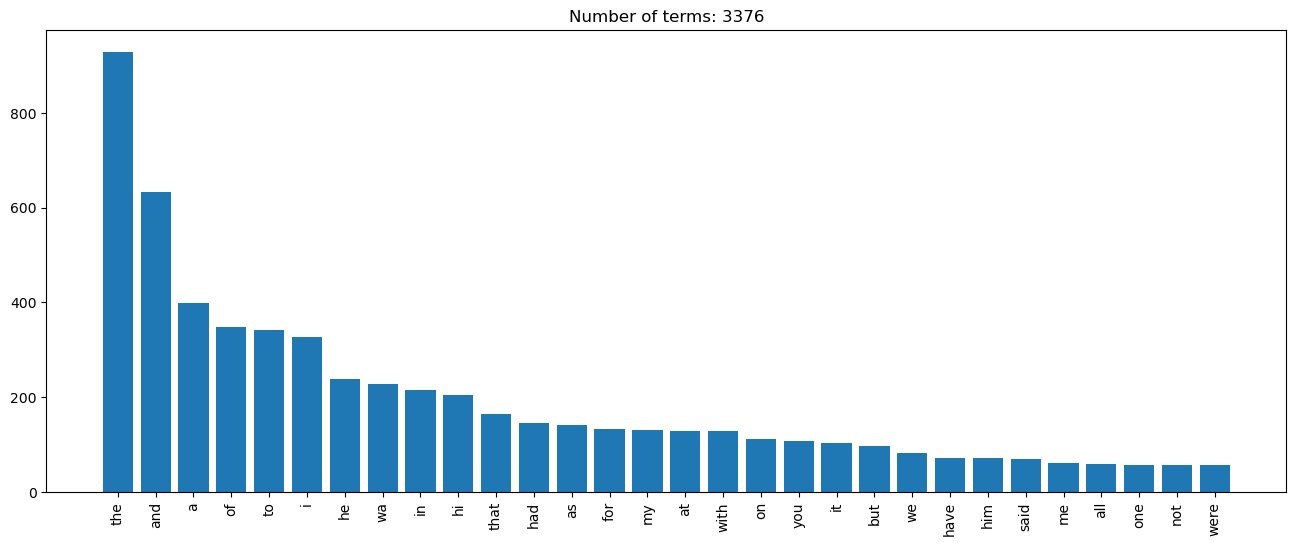

In [138]:
plot_words(stemmed.split())

# Identities

In [139]:
## nltk
entities = nltk.chunk.ne_chunk(tagged)
counter = 1
for e in entities:
    counter = counter+1
    s = re.sub(r'[\(\)]', '', str(e))
    if s.find('/NNP') > 0:
        t = s.split()[0]
        n = ' '.join([re.sub(r'/NNP', '', x) for x in s.split()[1:]])
        if (counter % 100 == 0) : # only prints 1 in 100
            print('%-12s: %s' % (t, n))

PERSON      : Black Dog
PERSON      : Dirk
FACILITY    : Captain


In [140]:
type(entities)

nltk.tree.tree.Tree

In [141]:
#Combo['Catc'] =[]

In [142]:
typea=[]
Type_Detail=[]
for e in entities:
    s = re.sub(r'[\(\)]', '', str(e))
    if s.find('/NNP') > 0:
        t = s.split()[0]
        n = ' '.join([re.sub(r'/NNP', '', x) for x in s.split()[1:]])
        #print('%-12s: %s' % (t, n))
        typea.append(t)
        Type_Detail.append(n)

In [143]:
#print(typea)

In [144]:
#print(typea)

In [145]:
typea2=pd.DataFrame( list(reader(typea)))
Type_Detail=pd.DataFrame( list(reader(Type_Detail)))

In [146]:
print(type(Type_Detail))

<class 'pandas.core.frame.DataFrame'>


In [147]:
#typea2

In [148]:
#Type_Detail

In [149]:
Type_Detail['Detail'] = Type_Detail

In [150]:
Type_Detail['Category'] = typea2

In [151]:
#typea2

In [152]:
Type_Detail.head()

,0,Detail,Category
0,Treasure/NN Island,Treasure/NN Island,PERSON
1,Robert Louis Stevenson,Robert Louis Stevenson,PERSON
2,PART,PART,ORGANIZATION
3,Old,Old,ORGANIZATION
4,Old,Old,ORGANIZATION


In [153]:
#Type_Detail['Category'] = typea2['Category'] 

In [154]:
Type_Detail['Category'].value_counts()

PERSON          184
GPE              41
ORGANIZATION     40
LOCATION          1
FACILITY          1
Name: Category, dtype: int64

In [155]:
Type_Detail.head()

,0,Detail,Category
0,Treasure/NN Island,Treasure/NN Island,PERSON
1,Robert Louis Stevenson,Robert Louis Stevenson,PERSON
2,PART,PART,ORGANIZATION
3,Old,Old,ORGANIZATION
4,Old,Old,ORGANIZATION


In [156]:
Type_Detail['Concat'] = (Type_Detail['Detail'] + Type_Detail['Category'])

In [157]:
Type_Detail.shape

(267, 4)

In [158]:
Type_Detail_Full = Type_Detail.copy()

In [159]:
People_Full = Type_Detail_Full[Type_Detail_Full['Category'] =='PERSON']
People_List = People_Full['Detail'].value_counts()
People_List=pd.DataFrame(People_List) #, columns = 'çount')
People_List.head(10)

,Detail
Livesey,23
Bill,20
Jim,17
Pew,12
Black Dog,11
Mr. Dance,10
Hawkins,6
Dogger,4
Flint,4
Scatter,3


In [160]:
Place_Full = Type_Detail_Full[Type_Detail_Full['Category'] =='GPE']
Place_List = Place_Full['Detail'].value_counts()
Place_List=pd.DataFrame(Place_List)
Place_List.head(10)

,Detail
Bristol,11
Redruth,7
London,3
England,3
Port,1
Long John,1
Mother,1
Livesey,1
August,1
English,1


In [161]:
Org_Full = Type_Detail_Full[Type_Detail_Full['Category'] =='ORGANIZATION']
Org_List = Org_Full['Detail'].value_counts()
Org_List=pd.DataFrame(Org_List)
Org_List.head(10)

,Detail
Admiral Benbow,12
HISPANIOLA,4
PART,2
Royal George,2
Majesty,2
Old,2
Savannah,1
SpaniardsS,1
Squire,1
Supervisor Dance,1


In [162]:
FACILITY_Full = Type_Detail_Full[Type_Detail_Full['Category'] =='FACILITY']
Facility_List = FACILITY_Full['Detail'].value_counts()
Facility_List=pd.DataFrame(Facility_List)
Facility_List.head(10)

,Detail
Captain,1


In [163]:
GSP_Full = Type_Detail_Full[Type_Detail_Full['Category'] =='GSP']
GSP_List = GSP_Full['Detail'].value_counts()
GSP_List=pd.DataFrame(GSP_List)
GSP_List.head(10)

,Detail


In [164]:
LOCATION_Full = Type_Detail_Full[Type_Detail_Full['Category'] =='LOCATION']
Location_List = LOCATION_Full['Detail'].value_counts()
Location_List=pd.DataFrame(GSP_List)
Location_List.head(10)

,Detail


In [165]:
Type_Detail.drop_duplicates(subset ="Concat",  keep = False, inplace = True) 

In [166]:
Type_Detail.shape

(73, 4)

In [167]:
Type_Detail.head()

,0,Detail,Category,Concat
0,Treasure/NN Island,Treasure/NN Island,PERSON,Treasure/NN IslandPERSON
1,Robert Louis Stevenson,Robert Louis Stevenson,PERSON,Robert Louis StevensonPERSON
6,SQUIRE,SQUIRE,ORGANIZATION,SQUIREORGANIZATION
8,Treasure Island,Treasure Island,PERSON,Treasure IslandPERSON
13,Often,Often,PERSON,OftenPERSON


In [168]:
Type_Detail['Category'].value_counts()

PERSON          38
GPE             17
ORGANIZATION    16
LOCATION         1
FACILITY         1
Name: Category, dtype: int64

In [169]:
People= Type_Detail[Type_Detail['Category'] =='PERSON']
Places= Type_Detail[Type_Detail['Category'] =='GPE']
Orgs= Type_Detail[Type_Detail['Category'] =='ORGANIZATION']

In [170]:
Orgs['Detail'].head(10)

6              SQUIRE
15       Dry Tortugas
16    Spanish/JJ Main
26         Disappears
48                 No
57          Prophetic
62              Bible
63         Black Spot
73            Admiral
76           Savannah
Name: Detail, dtype: object

In [171]:
Places['Detail'].head(10)

22            Taylor
24           Silence
70              Cain
90     Captain Flint
122          Georges
137             Hole
159            Dance
179            Flint
181         Trinidad
182             Port
Name: Detail, dtype: object

In [172]:
People['Detail'].head(10)

0         Treasure/NN Island
1     Robert Louis Stevenson
8            Treasure Island
13                     Often
14                  Dreadful
17                       God
20                     Drink
53                       Rum
58        Master Billy Bones
61                       Mr.
Name: Detail, dtype: object

In [173]:
#typea2 = typea2.rename({'0' : 'Categ'}, axis=1)

# Look at Data

In [174]:
dfs = my_text

In [175]:
import sys
sys.getsizeof(my_text)

156460

In [176]:
#print(entities)

In [177]:
#print(sentences)

# Add counts

In [178]:
sentence_df['sentence_length'] = sentence_df['Sentence'].apply(len)
sentence_df['word_count'] = sentence_df['Sentence'].apply(lambda x: len(x.split()))
sentence_df['word_density'] = sentence_df['sentence_length'] / (sentence_df['word_count'] + 1)
sentence_df['punctuation_count'] = sentence_df['Sentence'].apply(lambda x: len(''.join(_ for _ in x if _ in string.punctuation))) 
sentence_df['title_word_count'] = sentence_df['Sentence'].apply(lambda x: len([w for w in x.split() if w.istitle()]))
sentence_df['uppercase_word_count'] = sentence_df['Sentence'].apply(lambda x: len([w for w in x.split() if w.isupper()]))

In [179]:
sentence_df.head(7)

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count
0,Treasure Island\nby Robert Louis Stevenson\n\n...,593,109,5.390909,11,19,5
1,"I remember him as if it were yesterday, as he ...",349,61,5.629032,16,1,1
2,I remember him looking round the cover and whi...,322,60,5.278689,9,2,1
3,Then he rapped on the door with a bit of stick...,144,29,4.800000,3,1,0
4,"This, when it was brought to him, he drank slo...",160,30,5.161290,5,1,0
5,"“This is a handy cove,” says he at length; “an...",79,14,5.266667,4,1,0
6,"Much company, mate?”\n\nMy father told him no,...",88,16,5.176471,5,2,0


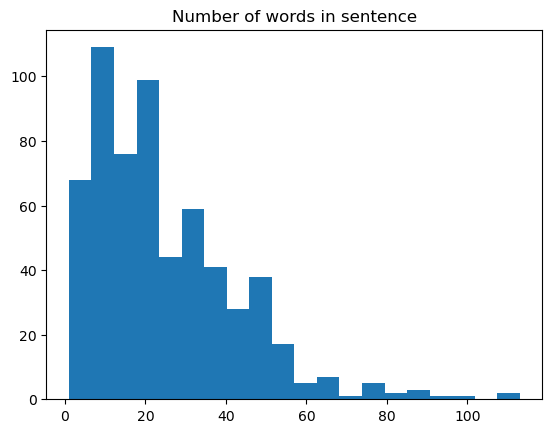

In [180]:
import matplotlib.pyplot as plt
num_bins = 20
plt.title('Number of words in sentence')
plt.hist(sentence_df['word_count'], bins =num_bins)
plt.show()


In [181]:
sentence_df.sum()

Sentence                Treasure Island\nby Robert Louis Stevenson\n\n...
sentence_length                                                     77422
word_count                                                          14938
word_density                                                  2929.134849
punctuation_count                                                    2437
title_word_count                                                     1313
uppercase_word_count                                                  402
dtype: object

In [182]:
sentence_df.describe()

,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,127.759076,24.650165,4.833556,4.021452,2.166667,0.663366
std,94.367672,17.995033,0.595677,2.934751,1.879057,0.985286
min,4.000000,1.000000,2.000000,1.000000,0.000000,0.000000
25%,55.000000,11.000000,4.531674,2.000000,1.000000,0.000000
50%,101.000000,20.000000,4.913043,3.000000,2.000000,0.000000
75%,177.750000,34.000000,5.178571,5.000000,3.000000,1.000000
max,636.000000,113.000000,7.307692,26.000000,19.000000,6.000000


In [183]:
# From 9.6

In [184]:
def convert_text(text):
    '''
    Use techniques learned in previous labs. Remove StopWords, Punctuation, Lemmatize etc.
    '''
    doc = nlp(text)
    tokens = [t for t in doc if not (t.is_stop | t.is_punct)]
    tokens = [t.lemma_ for t in tokens]
    clean_text = ' '.join(tokens)

    return clean_text

In [185]:
sentence_df['short'] = sentence_df['Sentence'].apply(convert_text)

In [186]:
sentence_df.head()

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short
0,Treasure Island\nby Robert Louis Stevenson\n\n...,593,109,5.390909,11,19,5,Treasure Island \n Robert Louis Stevenson \n\n...
1,"I remember him as if it were yesterday, as he ...",349,61,5.629032,16,1,1,remember yesterday came plod inn door sea ches...
2,I remember him looking round the cover and whi...,322,60,5.278689,9,2,1,remember look round cover whistle break old se...
3,Then he rapped on the door with a bit of stick...,144,29,4.800000,3,1,0,rap door bit stick like handspike carry father...
4,"This, when it was brought to him, he drank slo...",160,30,5.161290,5,1,0,bring drink slowly like connoisseur linger tas...


# Sentiment
* https://www.programcreek.com/python/example/100005/nltk.sentiment.vader.SentimentIntensityAnalyzer

In [187]:
#sentence_df.head()

In [188]:
sentence_df.shape

(606, 8)

In [189]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA


In [190]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [191]:
stripped_df.head()

,Words
0,Treasure
1,Island
2,by
3,Robert
4,Louis


In [192]:
sentence_df.head()

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short
0,Treasure Island\nby Robert Louis Stevenson\n\n...,593,109,5.390909,11,19,5,Treasure Island \n Robert Louis Stevenson \n\n...
1,"I remember him as if it were yesterday, as he ...",349,61,5.629032,16,1,1,remember yesterday came plod inn door sea ches...
2,I remember him looking round the cover and whi...,322,60,5.278689,9,2,1,remember look round cover whistle break old se...
3,Then he rapped on the door with a bit of stick...,144,29,4.800000,3,1,0,rap door bit stick like handspike carry father...
4,"This, when it was brought to him, he drank slo...",160,30,5.161290,5,1,0,bring drink slowly like connoisseur linger tas...


In [193]:
sia = SIA()
results = []

for i in range (len(sentence_df)):
    pol_score = sia.polarity_scores(sentence_df['Sentence'][i])
    results.append(pol_score)
    #print(i)
    #print(results)

In [194]:
 print(type(results))

<class 'list'>


In [195]:
 #print(results)

In [196]:
results_df = pd.DataFrame(results) #.reset_index()

In [197]:
results_df.head()

,neg,neu,pos,compound
0,0.023,0.855,0.122,0.8641
1,0.193,0.759,0.048,-0.8360
2,0.121,0.879,0.000,-0.8268
3,0.000,0.909,0.091,0.3612
4,0.000,0.918,0.082,0.3612


In [198]:
results_df.shape

(606, 4)

In [199]:
sentence_df.shape

(606, 8)

In [200]:
results_df['AlexMarker'] = "TBD"
results_df['AlexMarkerPrevalent'] = "TBD"

In [201]:
results_df.head()

,neg,neu,pos,compound,AlexMarker,AlexMarkerPrevalent
0,0.023,0.855,0.122,0.8641,TBD,TBD
1,0.193,0.759,0.048,-0.8360,TBD,TBD
2,0.121,0.879,0.000,-0.8268,TBD,TBD
3,0.000,0.909,0.091,0.3612,TBD,TBD
4,0.000,0.918,0.082,0.3612,TBD,TBD


In [202]:
for i in range (len(results_df)):
   # print(results_df['neg'][i] )
    if results_df['neg'][i] >  results_df['pos'][i]:
        if results_df['neg'][i] >  results_df['neu'][i]:
            results_df['AlexMarker'][i] ="Negative"
        else:
            results_df['AlexMarker'][i] ="Neutral"
    else:
        if results_df['pos'][i] >  results_df['neu'][i]:
            results_df['AlexMarker'][i] ="Positive"
        else:
            results_df['AlexMarker'][i] ="Neutral"


C:\Users\sasha\AppData\Local\Temp\ipykernel_4904\1297290326.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['AlexMarker'][i] ="Neutral"
C:\Users\sasha\AppData\Local\Temp\ipykernel_4904\1297290326.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['AlexMarker'][i] ="Neutral"
C:\Users\sasha\AppData\Local\Temp\ipykernel_4904\1297290326.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['AlexMarker'

In [203]:
results_df.head()

,neg,neu,pos,compound,AlexMarker,AlexMarkerPrevalent
0,0.023,0.855,0.122,0.8641,Neutral,TBD
1,0.193,0.759,0.048,-0.8360,Neutral,TBD
2,0.121,0.879,0.000,-0.8268,Neutral,TBD
3,0.000,0.909,0.091,0.3612,Neutral,TBD
4,0.000,0.918,0.082,0.3612,Neutral,TBD


In [204]:
sentence_df['neg'] = results_df['neg']
sentence_df['neu'] = results_df['neu']
sentence_df['pos'] = results_df['pos']
sentence_df['compound'] = results_df['compound']
sentence_df['AlexMarker'] = results_df['AlexMarker']

In [205]:
sentence_df['AlexMarker'].value_counts()

Neutral     600
Positive      3
Negative      3
Name: AlexMarker, dtype: int64

In [206]:
sentence_df.head(5)

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short,neg,neu,pos,compound,AlexMarker
0,Treasure Island\nby Robert Louis Stevenson\n\n...,593,109,5.390909,11,19,5,Treasure Island \n Robert Louis Stevenson \n\n...,0.023,0.855,0.122,0.8641,Neutral
1,"I remember him as if it were yesterday, as he ...",349,61,5.629032,16,1,1,remember yesterday came plod inn door sea ches...,0.193,0.759,0.048,-0.8360,Neutral
2,I remember him looking round the cover and whi...,322,60,5.278689,9,2,1,remember look round cover whistle break old se...,0.121,0.879,0.000,-0.8268,Neutral
3,Then he rapped on the door with a bit of stick...,144,29,4.800000,3,1,0,rap door bit stick like handspike carry father...,0.000,0.909,0.091,0.3612,Neutral
4,"This, when it was brought to him, he drank slo...",160,30,5.161290,5,1,0,bring drink slowly like connoisseur linger tas...,0.000,0.918,0.082,0.3612,Neutral


In [207]:
tempneg = sentence_df.sort_values(by=['neg'],ascending=False)

In [208]:
tempneg.head(10)

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short,neg,neu,pos,compound,AlexMarker
390,"Pew was dead, stone dead.",25,5,4.166667,2,1,0,Pew dead stone dead,0.741,0.259,0.0,-0.8625,Negative
179,“Thunder!” he cried.,20,3,5.000000,2,1,0,thunder cry,0.591,0.409,0.0,-0.4389,Negative
114,"“No, no, no, no; and an end of it!” he cried o...",50,12,3.846154,6,1,0,end cry,0.543,0.457,0.0,-0.8172,Negative
36,His stories were what frightened people worst ...,53,9,5.300000,1,1,0,story frighten people bad,0.500,0.500,0.0,-0.7906,Neutral
244,“Ten o’clock!” he cried.,24,4,4.800000,2,1,0,o’clock cry,0.491,0.509,0.0,-0.4389,Neutral
250,The captain had been struck dead by thundering...,56,9,5.600000,1,1,0,captain strike dead thunder apoplexy,0.474,0.526,0.0,-0.7430,Neutral
196,“HE’S a bad un; but there’s worse that put him...,50,11,4.166667,2,0,1,bad un bad,0.444,0.556,0.0,-0.7506,Neutral
229,"Another gentleman–”\n\n“Come, now, march,” int...",132,23,5.500000,7,3,1,gentleman \n\n come march interrupt hear voice...,0.435,0.565,0.0,-0.9196,Neutral
249,But haste was all in vain.,26,6,3.714286,1,1,0,haste vain,0.425,0.575,0.0,-0.5719,Neutral
482,“Thrifty man!” cried the doctor.,32,5,5.333333,2,1,0,thrifty man cry doctor,0.420,0.580,0.0,-0.4389,Neutral


In [209]:
temppos = sentence_df.sort_values(by=['pos'],ascending=False)

In [210]:
temppos.head(10)

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short,neg,neu,pos,compound,AlexMarker
83,"Ah, well!",9,2,3.000000,2,1,0,ah,0.000,0.295,0.705,0.3382,Positive
541,Hang the treasure!,18,3,4.500000,1,1,0,hang treasure,0.000,0.445,0.555,0.3595,Positive
428,"“And good evening to you, friend Jim.",37,7,4.625000,2,2,0,good evening friend Jim,0.000,0.450,0.550,0.7269,Positive
393,He hailed her.,14,3,3.500000,1,1,0,hail,0.000,0.513,0.487,0.2263,Neutral
584,It was a bright enough little place of enterta...,53,9,5.300000,1,1,0,bright little place entertainment,0.000,0.525,0.475,0.6637,Neutral
240,Hold out your left hand.,24,5,4.000000,1,1,0,hold left hand,0.000,0.556,0.444,0.4939,Neutral
177,"“Aye, aye,” said he, “that’s some better, sure...",54,9,5.400000,5,1,0,aye aye say well sure,0.000,0.574,0.426,0.6369,Neutral
93,"But the great thing for boys is discipline, so...",61,9,6.100000,2,1,0,great thing boy discipline sonny discipline,0.000,0.586,0.414,0.7684,Neutral
590,"He was very tall and strong, with a face as bi...",101,20,4.809524,3,1,0,tall strong face big ham plain pale intelligen...,0.000,0.593,0.407,0.8829,Neutral
222,"Will you give me your hand, my kind young frie...",171,33,5.029412,8,2,1,hand kind young friend lead \n\n hold hand hor...,0.081,0.558,0.360,0.9001,Neutral


In [211]:
sentence_df_sentiment_only = sentence_df.copy()

In [212]:
sentence_df_sentiment_only = sentence_df_sentiment_only.drop(["sentence_length","word_count","word_density","punctuation_count","title_word_count","uppercase_word_count" ],axis=1,inplace=True)

In [213]:
print(sentence_df_sentiment_only)

None


In [214]:
sentence_df['compound_cut'] = pd.cut(sentence_df['compound'],10)
sentence_df['pos_cut'] = pd.cut(sentence_df['pos'],10)
sentence_df['neg_cut'] = pd.cut(sentence_df['neg'],10)
sentence_df['neu_cut'] = pd.cut(sentence_df['neu'],10)

In [215]:
#pd.cut(sentence_df['neg'],10)

In [216]:
sentence_df['compound_qcut'] = pd.qcut(sentence_df['compound'],10,duplicates='drop') # duplicates='drop')
sentence_df['pos_qcut'] = pd.qcut(sentence_df['pos'],10,duplicates='drop') # duplicates='drop')
sentence_df['neg_qcut'] = pd.qcut(sentence_df['neg'],10,duplicates='drop') # duplicates='drop')
sentence_df['neu_qcut'] = pd.qcut(sentence_df['neu'],10,duplicates='drop') # duplicates='drop')

In [217]:
sentence_df.head(5)

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short,neg,neu,...,compound,AlexMarker,compound_cut,pos_cut,neg_cut,neu_cut,compound_qcut,pos_qcut,neg_qcut,neu_qcut
0,Treasure Island\nby Robert Louis Stevenson\n\n...,593,109,5.390909,11,19,5,Treasure Island \n Robert Louis Stevenson \n\n...,0.023,0.855,...,0.8641,Neutral,"(0.762, 0.956]","(0.0705, 0.141]","(-0.000741, 0.0741]","(0.852, 0.926]","(0.649, 0.956]","(0.101, 0.155]","(-0.001, 0.058]","(0.83, 0.87]"
1,"I remember him as if it were yesterday, as he ...",349,61,5.629032,16,1,1,remember yesterday came plod inn door sea ches...,0.193,0.759,...,-0.8360,Neutral,"(-0.982, -0.787]","(-0.000705, 0.0705]","(0.148, 0.222]","(0.704, 0.778]","(-0.981, -0.625]","(-0.001, 0.059]","(0.154, 0.241]","(0.736, 0.792]"
2,I remember him looking round the cover and whi...,322,60,5.278689,9,2,1,remember look round cover whistle break old se...,0.121,0.879,...,-0.8268,Neutral,"(-0.982, -0.787]","(-0.000705, 0.0705]","(0.0741, 0.148]","(0.852, 0.926]","(-0.981, -0.625]","(-0.001, 0.059]","(0.094, 0.154]","(0.87, 0.909]"
3,Then he rapped on the door with a bit of stick...,144,29,4.800000,3,1,0,rap door bit stick like handspike carry father...,0.000,0.909,...,0.3612,Neutral,"(0.181, 0.375]","(0.0705, 0.141]","(-0.000741, 0.0741]","(0.852, 0.926]","(0.226, 0.44]","(0.059, 0.101]","(-0.001, 0.058]","(0.87, 0.909]"
4,"This, when it was brought to him, he drank slo...",160,30,5.161290,5,1,0,bring drink slowly like connoisseur linger tas...,0.000,0.918,...,0.3612,Neutral,"(0.181, 0.375]","(0.0705, 0.141]","(-0.000741, 0.0741]","(0.852, 0.926]","(0.226, 0.44]","(0.059, 0.101]","(-0.001, 0.058]","(0.909, 1.0]"


In [218]:
sentence_df['pos_cut'].value_counts()

(-0.000705, 0.0705]    379
(0.0705, 0.141]         92
(0.141, 0.211]          73
(0.211, 0.282]          38
(0.282, 0.352]          14
(0.423, 0.493]           4
(0.352, 0.423]           3
(0.493, 0.564]           2
(0.634, 0.705]           1
(0.564, 0.634]           0
Name: pos_cut, dtype: int64

In [219]:
sentence_df['pos_qcut'].value_counts()

(-0.001, 0.059]    366
(0.101, 0.155]      63
(0.212, 0.705]      60
(0.155, 0.212]      59
(0.059, 0.101]      58
Name: pos_qcut, dtype: int64

In [220]:
sentence_df['neg_qcut'].value_counts()

(-0.001, 0.058]    364
(0.058, 0.094]      61
(0.154, 0.241]      61
(0.094, 0.154]      60
(0.241, 0.741]      60
Name: neg_qcut, dtype: int64

In [221]:
sentence_df['neu_qcut'].value_counts()

(0.909, 1.0]      241
(0.662, 0.736]     63
(0.258, 0.662]     61
(0.792, 0.83]      61
(0.83, 0.87]       61
(0.87, 0.909]      61
(0.736, 0.792]     58
Name: neu_qcut, dtype: int64

In [222]:
sentence_df['compound_qcut'].value_counts()

(-0.103, 0.0]       201
(-0.625, -0.382]     73
(-0.981, -0.625]     63
(0.226, 0.44]        62
(0.44, 0.649]        59
(0.649, 0.956]       59
(-0.382, -0.103]     50
(0.0, 0.226]         39
Name: compound_qcut, dtype: int64

In [223]:
positive_df = sentence_df[sentence_df['AlexMarker']=="Positive"]

In [224]:
negative_df = sentence_df[sentence_df['AlexMarker']=="Negative"]

In [225]:
#positive_df.sample(10)

In [226]:
positive_df.shape

(3, 21)

C:\Users\sasha\AppData\Local\Temp\ipykernel_4904\215399902.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(positive_df['compound'], shade=True, color="g", label="Compound", alpha=.9)
C:\Users\sasha\AppData\Local\Temp\ipykernel_4904\215399902.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(positive_df['pos'], shade=True, color="deeppink", label="Positive", alpha=.7)
C:\Users\sasha\AppData\Local\Temp\ipykernel_4904\215399902.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(positive_df['neu'], shade=True, color="orange", label="Neutral", alpha=.7)


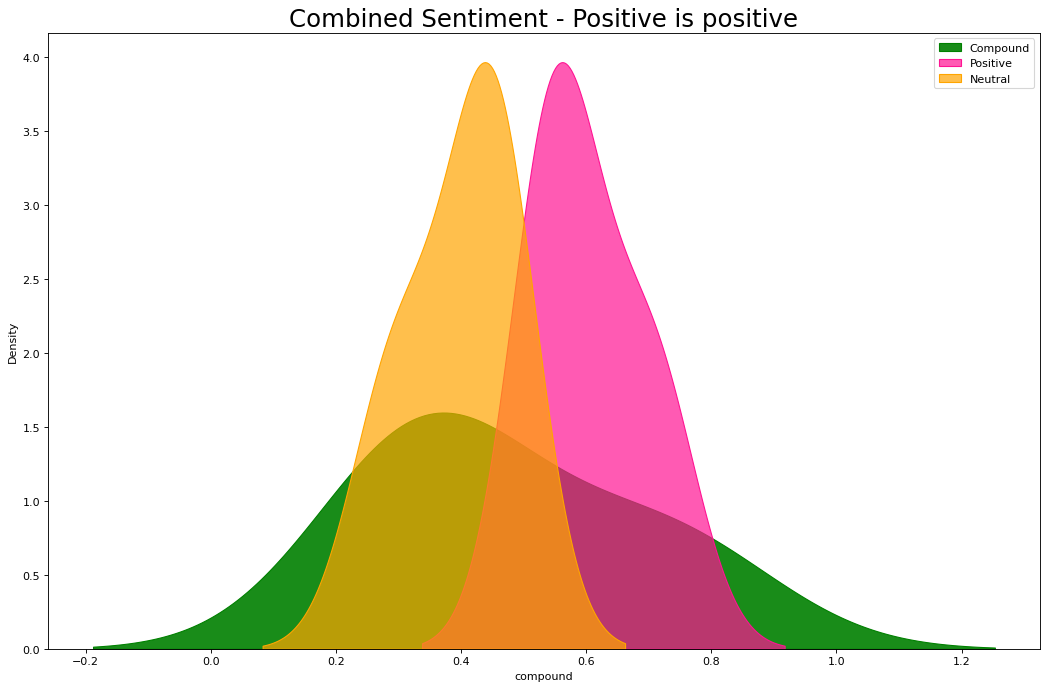

In [227]:
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(positive_df['compound'], shade=True, color="g", label="Compound", alpha=.9)
sns.kdeplot(positive_df['pos'], shade=True, color="deeppink", label="Positive", alpha=.7)
#sns.kdeplot(positive_df['neg'], shade=True, color="dodgerblue", label="Negative", alpha=.7)
#sns.kdeplot(positive_df['neg'], shade=True, color="blue", label="Negative", alpha=.7)
sns.kdeplot(positive_df['neu'], shade=True, color="orange", label="Neutral", alpha=.7)
plt.title('Combined Sentiment - Positive is positive', fontsize=22)
plt.legend()
plt.show()

C:\Users\sasha\AppData\Local\Temp\ipykernel_4904\2151722904.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sentence_df['compound'], shade=True, color="g", label="Compound", alpha=.7)


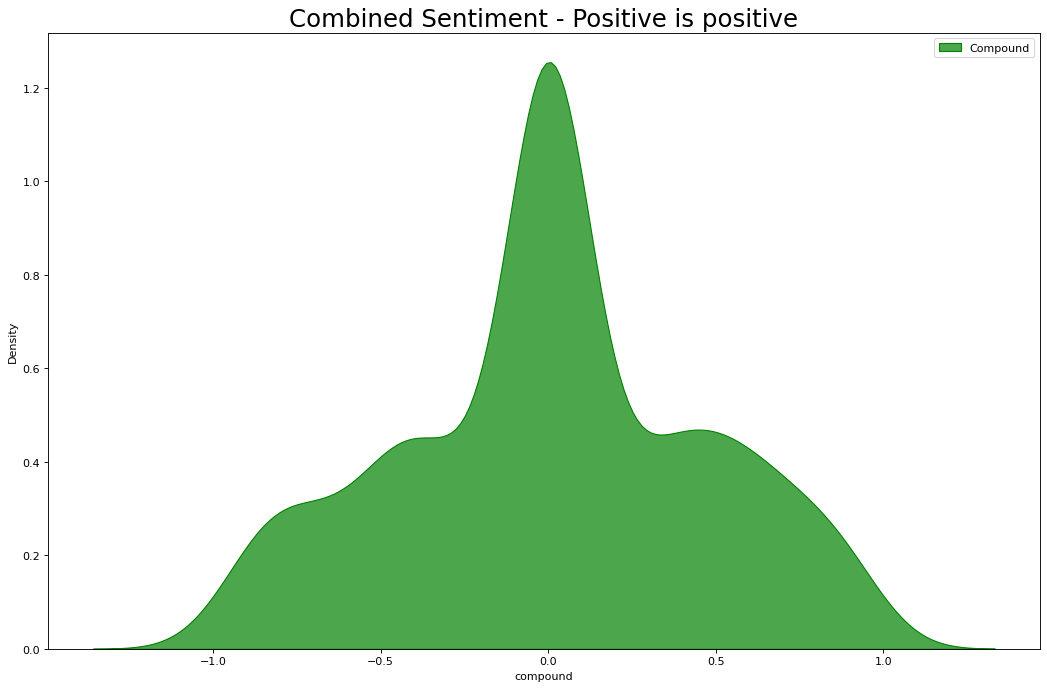

In [228]:
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(sentence_df['compound'], shade=True, color="g", label="Compound", alpha=.7)
plt.title('Combined Sentiment - Positive is positive', fontsize=22)
plt.legend()
plt.show()

In [229]:
negative_df.head(5)

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short,neg,neu,...,compound,AlexMarker,compound_cut,pos_cut,neg_cut,neu_cut,compound_qcut,pos_qcut,neg_qcut,neu_qcut
114,"“No, no, no, no; and an end of it!” he cried o...",50,12,3.846154,6,1,0,end cry,0.543,0.457,...,-0.8172,Negative,"(-0.982, -0.787]","(-0.000705, 0.0705]","(0.519, 0.593]","(0.407, 0.481]","(-0.981, -0.625]","(-0.001, 0.059]","(0.241, 0.741]","(0.258, 0.662]"
179,“Thunder!” he cried.,20,3,5.000000,2,1,0,thunder cry,0.591,0.409,...,-0.4389,Negative,"(-0.593, -0.4]","(-0.000705, 0.0705]","(0.519, 0.593]","(0.407, 0.481]","(-0.625, -0.382]","(-0.001, 0.059]","(0.241, 0.741]","(0.258, 0.662]"
390,"Pew was dead, stone dead.",25,5,4.166667,2,1,0,Pew dead stone dead,0.741,0.259,...,-0.8625,Negative,"(-0.982, -0.787]","(-0.000705, 0.0705]","(0.667, 0.741]","(0.258, 0.333]","(-0.981, -0.625]","(-0.001, 0.059]","(0.241, 0.741]","(0.258, 0.662]"


In [230]:
#positive_df.sample(5)

C:\Users\sasha\AppData\Local\Temp\ipykernel_4904\1301886755.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(negative_df['compound'], shade=True, color="g", label="Compound", alpha=.9)
C:\Users\sasha\AppData\Local\Temp\ipykernel_4904\1301886755.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(negative_df['pos'], shade=True, color="deeppink", label="Positive", alpha=.7)
C:\Users\sasha\AppData\Local\Temp\ipykernel_4904\1301886755.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(negative_df['pos'], shade=True, color="deeppink", label="Positive", alpha=.7)
C:\Users\sasha\AppData\Local\Temp\ipykernel_4904\1301886755.py:4: FutureWarning: 

`shade` is now de

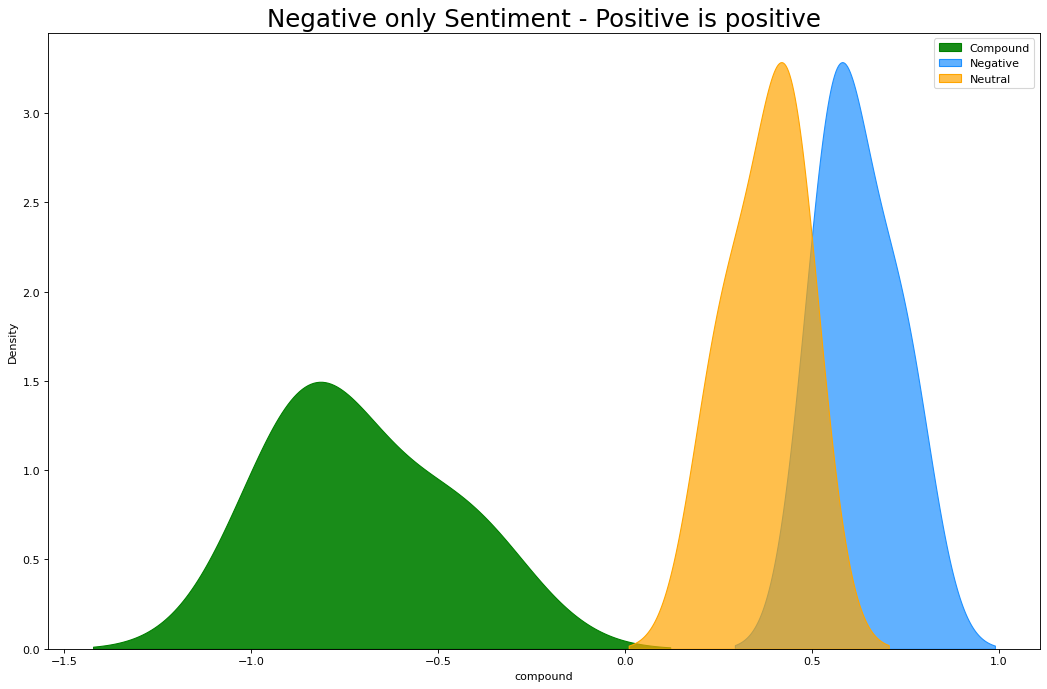

In [231]:
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(negative_df['compound'], shade=True, color="g", label="Compound", alpha=.9)
sns.kdeplot(negative_df['pos'], shade=True, color="deeppink", label="Positive", alpha=.7)
sns.kdeplot(negative_df['neg'], shade=True, color="dodgerblue", label="Negative", alpha=.7)
sns.kdeplot(negative_df['neu'], shade=True, color="orange", label="Neutral", alpha=.7)
plt.title('Negative only Sentiment - Positive is positive', fontsize=22)
plt.legend()
plt.show()

C:\Users\sasha\AppData\Local\Temp\ipykernel_4904\275079426.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sentence_df['compound'], shade=True, color="g", label="Compound", alpha=.7)
C:\Users\sasha\AppData\Local\Temp\ipykernel_4904\275079426.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sentence_df['pos'], shade=True, color="deeppink", label="Positive", alpha=.7)
C:\Users\sasha\AppData\Local\Temp\ipykernel_4904\275079426.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sentence_df['neg'], shade=True, color="dodgerblue", label="Negative", alpha=.7)
C:\Users\sasha\AppData\Local\Temp\ipykernel_4904\275079426.py

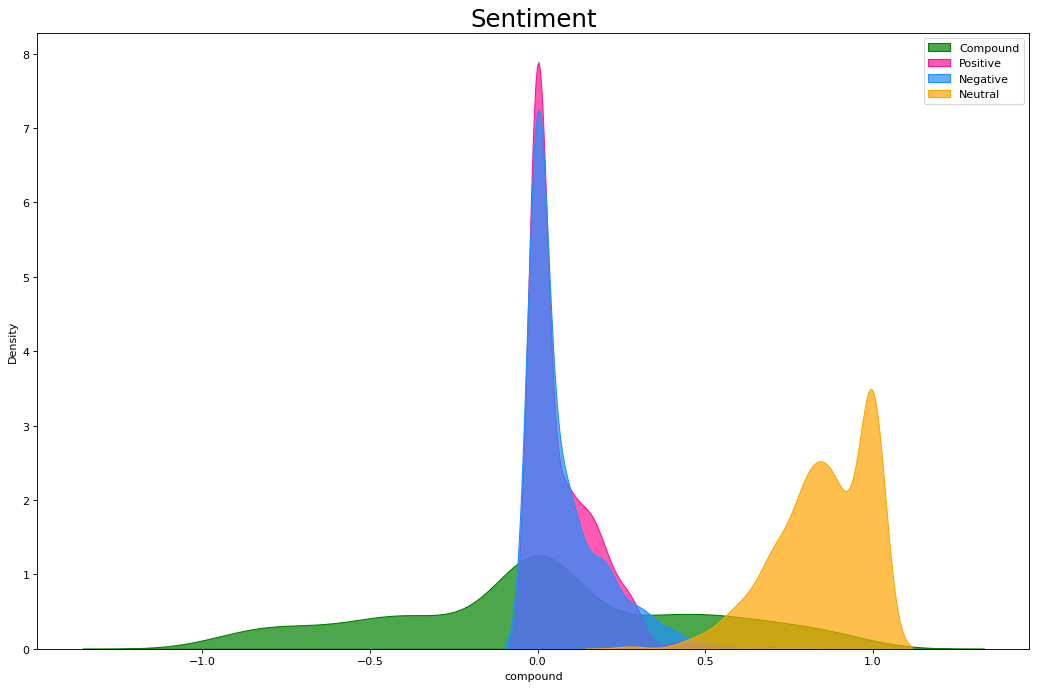

In [232]:
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(sentence_df['compound'], shade=True, color="g", label="Compound", alpha=.7)
sns.kdeplot(sentence_df['pos'], shade=True, color="deeppink", label="Positive", alpha=.7)
sns.kdeplot(sentence_df['neg'], shade=True, color="dodgerblue", label="Negative", alpha=.7)
sns.kdeplot(sentence_df['neu'], shade=True, color="orange", label="Neutral", alpha=.7)

# Decoration
plt.title('Sentiment', fontsize=22)
plt.legend()
plt.show()

C:\Users\sasha\AppData\Local\Temp\ipykernel_4904\282239424.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sentence_df['AlexMarker'] =="neu", shade=True, color="g", label="Compound", alpha=.7)
C:\Users\sasha\AppData\Local\Temp\ipykernel_4904\282239424.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(sentence_df['AlexMarker'] =="neu", shade=True, color="g", label="Compound", alpha=.7)
C:\Users\sasha\AppData\Local\Temp\ipykernel_4904\282239424.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sentence_df['pos'], shade=True, color="deeppink", label="Positive", alpha=.7)
C:\Users\sasha\AppData\Local\Temp\ipykernel_4904\282239424.py:4: FutureWarning: 

`sh

<Axes: xlabel='AlexMarker', ylabel='Density'>

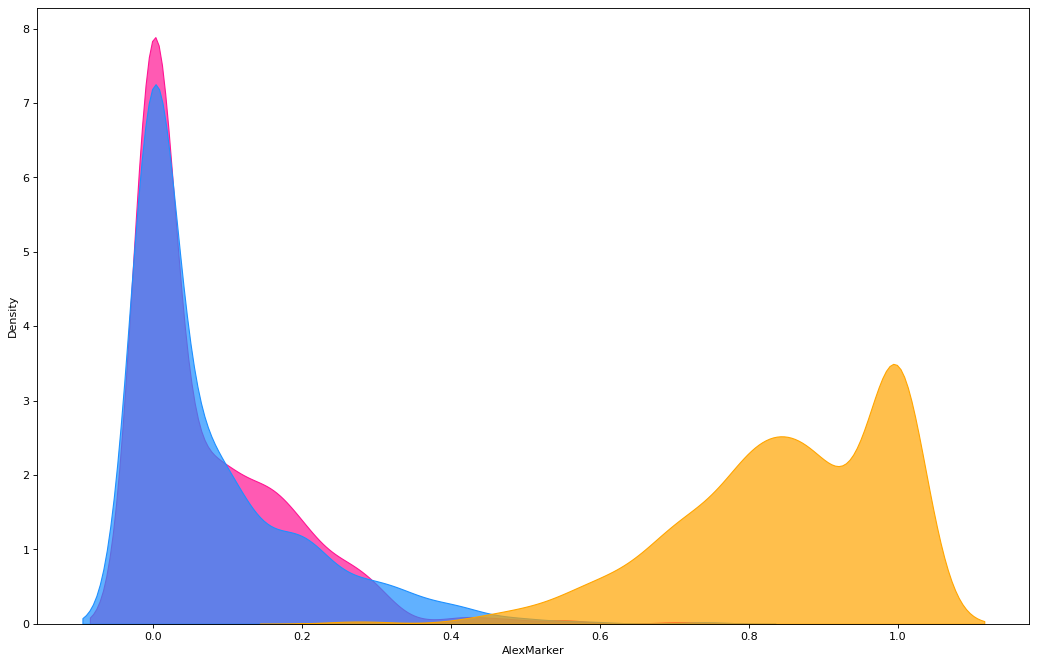

In [233]:
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(sentence_df['AlexMarker'] =="neu", shade=True, color="g", label="Compound", alpha=.7)
sns.kdeplot(sentence_df['pos'], shade=True, color="deeppink", label="Positive", alpha=.7)
sns.kdeplot(sentence_df['neg'], shade=True, color="dodgerblue", label="Negative", alpha=.7)
sns.kdeplot(sentence_df['neu'], shade=True, color="orange", label="Neutral", alpha=.7)


In [234]:
results_df['AlexMarker'].value_counts()

Neutral     600
Positive      3
Negative      3
Name: AlexMarker, dtype: int64

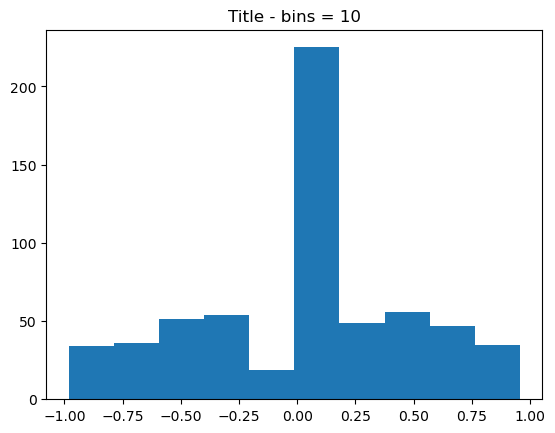

In [235]:
import matplotlib.pyplot as plt
num_bins = 10
plt.title('Title - bins = 10')
plt.hist(results_df['compound'], bins =num_bins)
plt.show()

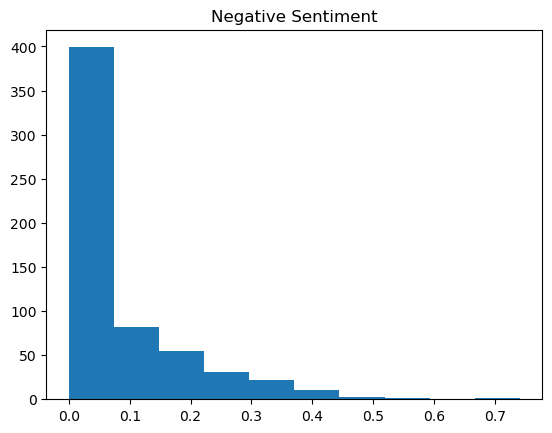

In [236]:
import matplotlib.pyplot as plt
num_bins = 10
plt.title('Negative Sentiment')
plt.hist(results_df['neg'], bins =num_bins)
plt.show()

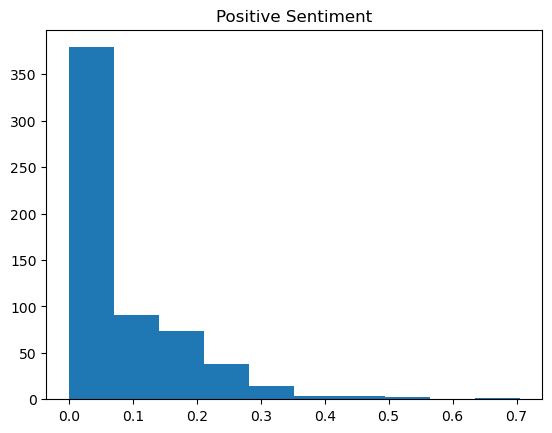

In [237]:
import matplotlib.pyplot as plt
num_bins = 10
plt.title('Positive Sentiment')
plt.hist(results_df['pos'], bins =num_bins)
plt.show()

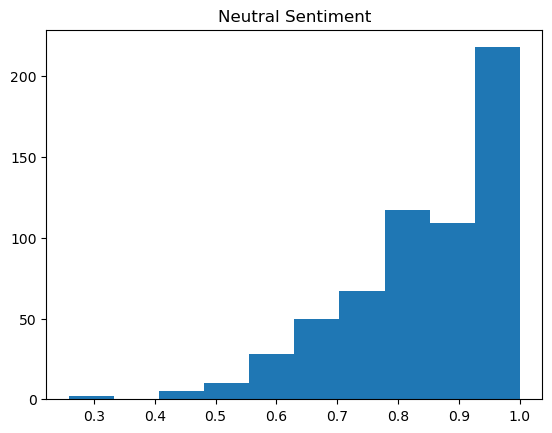

In [238]:
import matplotlib.pyplot as plt
num_bins = 10
plt.title('Neutral Sentiment')
plt.hist(results_df['neu'], bins =num_bins)
plt.show()

In [239]:
import seaborn as sns

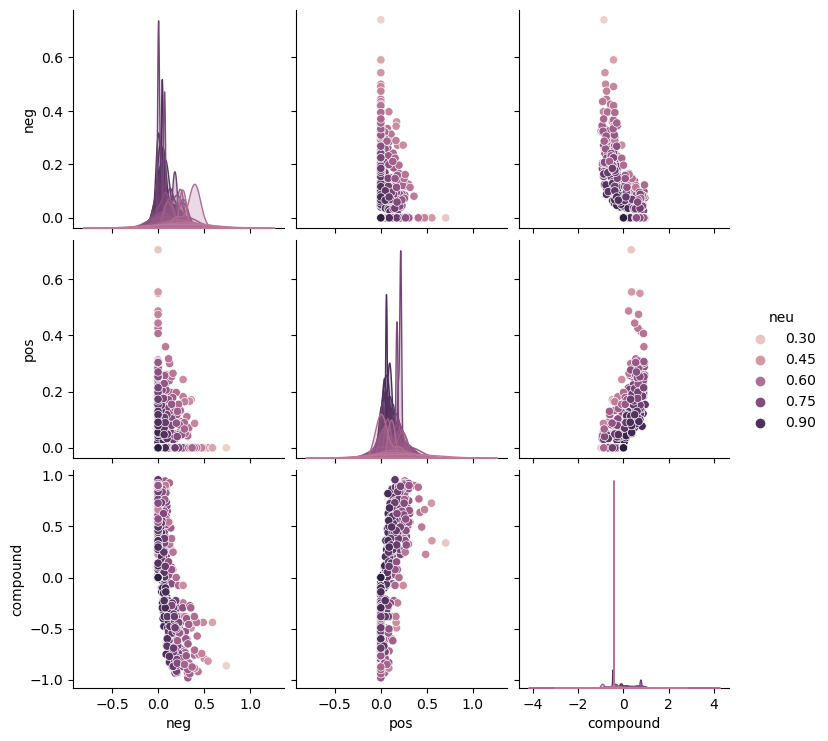

In [240]:
g = sns.pairplot(results_df, hue="neu")

# Multiple Word counts
* https://stackoverflow.com/questions/61218518/count-frequency-of-multi-word-terms-in-large-texts-with-python
* https://www.daniweb.com/programming/software-development/threads/292323/counting-phrases


In [241]:
def group_text2(text, group_size):
    """
    groups a text into text groups set by group_size
    returns a list of grouped strings
    """
    word_list = text.split()
    group_list = []
    for k in range(len(word_list)):
        start = k
        end = k + group_size
        group_slice = word_list[start: end]
        # append only groups of proper length/size
        if len(group_slice) == group_size:
            group_list.append(" ".join(group_slice))
            #GS.append(" ".join(group_slice))
    return (group_list)

In [242]:
sentence_df.shape

(606, 21)

In [243]:
sentence_df.head()

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short,neg,neu,...,compound,AlexMarker,compound_cut,pos_cut,neg_cut,neu_cut,compound_qcut,pos_qcut,neg_qcut,neu_qcut
0,Treasure Island\nby Robert Louis Stevenson\n\n...,593,109,5.390909,11,19,5,Treasure Island \n Robert Louis Stevenson \n\n...,0.023,0.855,...,0.8641,Neutral,"(0.762, 0.956]","(0.0705, 0.141]","(-0.000741, 0.0741]","(0.852, 0.926]","(0.649, 0.956]","(0.101, 0.155]","(-0.001, 0.058]","(0.83, 0.87]"
1,"I remember him as if it were yesterday, as he ...",349,61,5.629032,16,1,1,remember yesterday came plod inn door sea ches...,0.193,0.759,...,-0.8360,Neutral,"(-0.982, -0.787]","(-0.000705, 0.0705]","(0.148, 0.222]","(0.704, 0.778]","(-0.981, -0.625]","(-0.001, 0.059]","(0.154, 0.241]","(0.736, 0.792]"
2,I remember him looking round the cover and whi...,322,60,5.278689,9,2,1,remember look round cover whistle break old se...,0.121,0.879,...,-0.8268,Neutral,"(-0.982, -0.787]","(-0.000705, 0.0705]","(0.0741, 0.148]","(0.852, 0.926]","(-0.981, -0.625]","(-0.001, 0.059]","(0.094, 0.154]","(0.87, 0.909]"
3,Then he rapped on the door with a bit of stick...,144,29,4.800000,3,1,0,rap door bit stick like handspike carry father...,0.000,0.909,...,0.3612,Neutral,"(0.181, 0.375]","(0.0705, 0.141]","(-0.000741, 0.0741]","(0.852, 0.926]","(0.226, 0.44]","(0.059, 0.101]","(-0.001, 0.058]","(0.87, 0.909]"
4,"This, when it was brought to him, he drank slo...",160,30,5.161290,5,1,0,bring drink slowly like connoisseur linger tas...,0.000,0.918,...,0.3612,Neutral,"(0.181, 0.375]","(0.0705, 0.141]","(-0.000741, 0.0741]","(0.852, 0.926]","(0.226, 0.44]","(0.059, 0.101]","(-0.001, 0.058]","(0.909, 1.0]"


In [244]:
#text = "I love you very much so very much"
#text = sentence_df['Sentence'][1]
text = my_text

In [245]:
#print(text)

In [246]:
# Now this
Grouped_Words8=[]
for group_size in range(3,50,1):
    #group_size = 4
    #group_list = group_text2(text, group_size)
    word_list = text.split()
    group_list = []
    for k in range(len(word_list)):
        start = k
        end = k + group_size
        group_slice = word_list[start: end]
    
        group_slice_joined= (" ".join(group_slice))
  
    
        # append only groups of proper length/size
        if len(group_slice) == group_size:

            Grouped_Words8 += [group_slice_joined] #test_list += [test_str] 
# convert list to set to avoid duplicates
#print(group_list)
group_set = set(group_list)
#Grouped_Words.append(group_set)
#Grouped_Words.append(group_list)

In [247]:
#print(Grouped_Words8)

In [248]:
Grouped_Words_df = pd.DataFrame(Grouped_Words8, columns=['phrases'])

In [249]:
#Grouped_Words_df['word_count'] = Grouped_Words_df['phrases'].apply(lambda x: len(x.split()))

In [250]:
Grouped_Words_df.head()

,phrases
0,Treasure Island by
1,Island by Robert
2,by Robert Louis
3,Robert Louis Stevenson
4,Louis Stevenson PART


In [251]:
Grouped_Words_more_than_one = Grouped_Words_df['phrases'].value_counts()

In [252]:
#print(Grouped_Words_more_than_one)

In [253]:
type(Grouped_Words_more_than_one)

pandas.core.series.Series

In [254]:
Grouped_Words_more_than_one.columns = ['phrase', 'count']

In [255]:
Grouped_Words_more_than_one.head()

out of the            8
the Admiral Benbow    6
cried the squire.     5
side of the           5
at the Admiral        5
Name: phrases, dtype: int64

In [256]:
Grouped_Words_more_than_one_df = pd.DataFrame(Grouped_Words_more_than_one).reset_index()

In [257]:
Grouped_Words_more_than_one_df.head()

,index,phrases
0,out of the,8
1,the Admiral Benbow,6
2,cried the squire.,5
3,side of the,5
4,at the Admiral,5


In [258]:
Grouped_Words_more_than_one_df.columns = ['phrase', 'count']

In [259]:
Grouped_Words_more_than_one_df.head()

,phrase,count
0,out of the,8
1,the Admiral Benbow,6
2,cried the squire.,5
3,side of the,5
4,at the Admiral,5


In [260]:
Grouped_Words_more_than_one_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700246 entries, 0 to 700245
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   phrase  700246 non-null  object
 1   count   700246 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.7+ MB


In [261]:
GW_short= Grouped_Words_more_than_one_df[Grouped_Words_more_than_one_df['count'] > 1 ]

In [262]:
GW_short.head()

,phrase,count
0,out of the,8
1,the Admiral Benbow,6
2,cried the squire.,5
3,side of the,5
4,at the Admiral,5


In [263]:
#GW_short.reset_index()

In [264]:
#GW_short = GW_short.rename(columns={'index': 'phrase', 'phrases': 'count'})

In [265]:
GW_short.head()

,phrase,count
0,out of the,8
1,the Admiral Benbow,6
2,cried the squire.,5
3,side of the,5
4,at the Admiral,5


In [266]:
GW_short['word_count'] = GW_short['phrase'].apply(lambda x: len(x.split()))

C:\Users\sasha\AppData\Local\Temp\ipykernel_4904\213461092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GW_short['word_count'] = GW_short['phrase'].apply(lambda x: len(x.split()))


In [267]:
GW_short['word_count'].value_counts()

3     413
4      74
5      20
6       8
7       6
8       5
9       4
10      3
11      2
12      1
Name: word_count, dtype: int64

In [268]:
GW3 = GW_short[GW_short['word_count'] == 3 ]
GW3.head(10)

,phrase,count,word_count
0,out of the,8,3
1,the Admiral Benbow,6,3
2,cried the squire.,5,3
3,side of the,5,3
4,at the Admiral,5,3
5,"said the doctor,",5,3
6,I could not,5,3
7,and at last,5,3
8,the blind man,5,3
9,said the doctor.,5,3


In [269]:
GW4 = GW_short[GW_short['word_count'] == 4 ]
GW4.head(10)

,phrase,count,word_count
10,seafaring man with one,4,4
27,and a bottle of,4,4
52,at the Admiral Benbow,3,4
80,"Yo-ho-ho, and a bottle",3,4
86,"man’s chest– Yo-ho-ho, and",2,4
88,a seafaring man with,2,4
100,expression of his face,2,4
101,The expression of his,2,4
114,before him on the,2,4
115,him on the table.,2,4


In [270]:
GW5 = GW_short[GW_short['word_count'] == 5 ]
GW5.head(10)

,phrase,count,word_count
49,"Yo-ho-ho, and a bottle of",3,5
139,As soon as I was,2,5
144,before him on the table.,2,5
147,at the same time a,2,5
158,a seafaring man with one,2,5
164,and a bottle of rum!”,2,5
167,"chest– Yo-ho-ho, and a bottle",2,5
168,"man’s chest– Yo-ho-ho, and a",2,5
169,"dead man’s chest– Yo-ho-ho, and",2,5
174,The expression of his face,2,5


In [271]:
GW6 = GW_short[GW_short['word_count'] == 6 ]
GW6.head()

,phrase,count,word_count
327,"Yo-ho-ho, and a bottle of rum!”",2,6
341,"chest– Yo-ho-ho, and a bottle of",2,6
342,"man’s chest– Yo-ho-ho, and a bottle",2,6
343,"dead man’s chest– Yo-ho-ho, and a",2,6
344,"the dead man’s chest– Yo-ho-ho, and",2,6


In [272]:
GW9 = GW_short[GW_short['word_count'] == 9 ]

In [273]:
GW9.shape

(4, 3)

In [274]:
GW9

,phrase,count,word_count
96,"on the dead man’s chest– Yo-ho-ho, and a bottle",2,9
113,“Fifteen men on the dead man’s chest– Yo-ho-ho...,2,9
131,"men on the dead man’s chest– Yo-ho-ho, and a",2,9
176,"the dead man’s chest– Yo-ho-ho, and a bottle of",2,9


In [275]:
GW24 = GW_short[GW_short['word_count'] == 24 ]
GW24

,phrase,count,word_count


In [276]:
GW25 = GW_short[GW_short['word_count'] == 25 ]
GW25

,phrase,count,word_count


In [277]:
#sentence_df.to_csv('/Users/sasha/Alex_Python_Folder/NLP Project1/sentence_df.csv')

# Spelling

* https://www.tutorialspoint.com/python_text_processing/python_spelling_check.htm
* https://textblob.readthedocs.io/en/dev/quickstart.html#part-of-speech-tagging

In [278]:
from spellchecker import SpellChecker

In [279]:
# from https://pypi.org/project/pyspellchecker/#:~:text=Utilities-,Project%20description,2%20from%20the%20original%20word.

spell = SpellChecker()  # loads default word frequency list
spell.word_frequency.load_text_file('my_text')


In [280]:
print(spell.word_frequency)

In [281]:
print(words)

['But', 'his', 'hurry', 'had', 'attracted', 'my', 'notice', ',', 'and', 'I', 'recognized', 'him', 'at']


In [282]:
misspelled_words = spell.unknown(words2)  # words  # words2 # stripped

In [283]:
misspelled_words_df = pd.DataFrame(misspelled_words,columns=['Words'])

In [284]:
#print(words2)

In [285]:
print(misspelled_words)

{'afternoon', 'nimbleness', 'd', 'curtained', 'unsteadied', 'caraccas', 'n', 't', 'dogger', 'hawke', 'bloodthirstiest', 'coltish', 'crossley', 'p', 'recommenced', 'sidetable', 'm', 'handspike', 'workpeople', 'scarcest', 's', '62o', '19o', 'calumnies', 'fidges', 'ors', 'coarsely', 'w', 'miscellany', 'figureheads', 'headforemost', 'benbow', 'tyrannized', 'exclamatory', 'puncheon', 'fourpenny', 'emboldener', 'mr', 'oilskin', 'cutlasses', 'foolhardiness', 'bleared', 'trebly', 'hispaniola', 'afterwards', 'quays', 'rheumatics', 'trelawney', 'blandly', 'lugger', 'tallowy', 'livesey', 'canikin', 'f', 'assizes', 'redruth', 'stevenson', 'b', 'hummock', 'tortugas', 'anticipations', 'mought', '17__', 'dr', 'nohow', 'gattling', 'offe', 'roughened', 'daddle', 'sailorly', 'lubbers', 'tarpaulins', 'tottery', 'archbishops', 'blackbeard', 'sharer', 'hilltops', 'redly', 'irresolute', 'mrs', 'sittyated', 'cheerily', '12th', 'superintend', 'mistily', 'capstan', 'chine', 'j', 'll', 'oilcloth', 'alow', 'glim

In [286]:
spell.known(misspelled_words)

set()

# Blob
https://textblob.readthedocs.io/en/dev/

In [287]:
text = my_text

In [288]:
blob = TextBlob(text)

In [289]:
# test 
b = TextBlob("burlap") #misspelled_words)
print(b, " is incorrect and correct is: " ,b.correct())

burlap  is incorrect and correct is:  bursa


In [290]:
misspelled_words_df.head()

,Words
0,afternoon
1,nimbleness
2,d
3,curtained
4,unsteadied


In [291]:
for i in range(len(misspelled_words_df)): #range (len (misspelled_words_df)):
    temp = misspelled_words_df.loc[i,"Words"]
    str_temp= str(temp)
    bword  = TextBlob(str_temp)
    correct = bword.correct()
    if (i % 10 == 0):
        print(temp, " is incorrent and correct is: ", correct)

afternoon  is incorrent and correct is:  afternoon
bloodthirstiest  is incorrent and correct is:  bloodthirstiest
s  is incorrent and correct is:  s
headforemost  is incorrent and correct is:  headforemost
foolhardiness  is incorrent and correct is:  foolhardiness
tallowy  is incorrent and correct is:  tallow
anticipations  is incorrent and correct is:  anticipation
lubbers  is incorrent and correct is:  rubbers
sittyated  is incorrent and correct is:  situated
alow  is incorrent and correct is:  low


In [292]:
#blob.tags      

In [293]:
type(blob.tags)   

list

In [294]:
for i in range(0, len(blob.tags)):
    if (i % 1000 == 0) : # only prints 1 in 1,000
        print(blob.tags [i])

('Treasure', 'NN')
('of', 'IN')
('”', 'NNP')
('jump', 'NN')
('us', 'PRP')
('’', 'JJ')
('house', 'NN')
('then', 'RB')
('holding', 'VBG')
('square', 'VB')
('that', 'IN')
('corns', 'NNS')
('the', 'DT')
('about', 'RB')
('and', 'CC')
('and', 'CC')


In [295]:
#blob.noun_phrases   # WordList(['titular threat', 'blob',
                    #            'ultimate movie monster',

In [296]:
counter = 1
for sentence in blob.sentences:
    counter =counter +1
    if (counter % 50 == 0) : # only prints 1 in 50
        print(sentence.sentiment.polarity)

0.4
0.20714285714285713
0.8
0.05
0.0
0.0265625
0.0
0.3666666666666667
0.10000000000000003
0.016666666666666663
0.6
0.25


In [297]:
for i in range(0, len(blob.sentences)):
    if (i % 100 == 0) : # only prints 1 in 1,000
        print(blob.sentences[i])
        #sentence.sentiment.polarity
        print(sentence.sentiment.polarity)

Treasure Island
by Robert Louis Stevenson

PART ONE

The Old Buccaneer

1

The Old Sea-dog at the Admiral Benbow

SQUIRE TRELAWNEY, Dr. Livesey, and the rest of these gentlemen having asked me to write down the whole particulars about Treasure Island, from the beginning to the end, keeping nothing back but the bearings of the island, and that only because there is still treasure not yet lifted, I take up my pen in the year of grace 17__ and go back to the time when my father kept the Admiral Benbow inn and the brown old seaman with the sabre cut first took up his lodging under our roof.
0.0
At last in strode the captain, slammed the door behind him, without looking to the right or left, and marched straight across the room to where his breakfast awaited him.
0.0
He gave it me at Savannah, when he lay a-dying, like as if I was to now, you see.
0.0
In the meantime, we had found nothing of any value but the silver and the trinkets, and neither of these were in our way.
0.0
I went back wit

# Other Useful links
* https://stackabuse.com/python-for-nlp-working-with-text-and-pdf-files/
* https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63
* https://www.datacamp.com/community/tutorials/simplifying-sentiment-analysis-python
* https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk
* https://machinelearningmastery.com/clean-text-machine-learning-python/